# 7.9 Exercises

## Exercise 6

In this exercise, you will further analyze the Wage data set considered throughout this chapter.

### Step (a)
> Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree `d` for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make a plot of the resulting polynomial fit to the data.

In [1]:
library(ISLR)
attach(Wage)
options(repr.plot.width = 8, repr.plot.height = 8) # set graphics options

First let's explore our dataset and specifically the relationship between `age` and `wage`

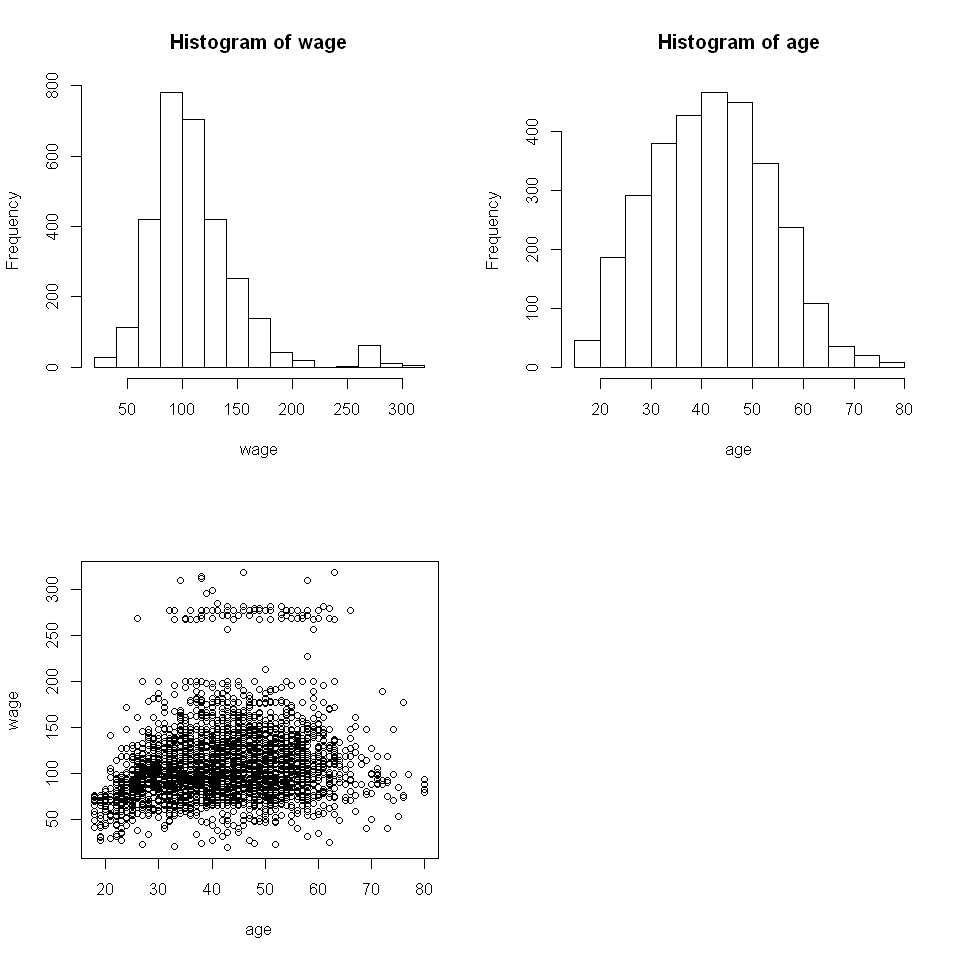

In [2]:
par(mfrow=c(2,2))
hist(wage)
hist(age)
plot(age, wage)

We can observe that while `wage` has a slightly skewed distribution with a slightly long tail, `age` is normally distributed. The relationship between `age` and `wage` seems somewhat cubic. Let's try perform polynomial regression to find out the best model that can fit the data.

In [3]:
fit = lm(wage~poly(age, 5), data=Wage)
summary(fit)


Call:
lm(formula = wage ~ poly(age, 5), data = Wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-99.049 -24.386  -5.028  15.344 202.886 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    111.7036     0.7288 153.278  < 2e-16 ***
poly(age, 5)1  447.0679    39.9161  11.200  < 2e-16 ***
poly(age, 5)2 -478.3158    39.9161 -11.983  < 2e-16 ***
poly(age, 5)3  125.5217    39.9161   3.145  0.00168 ** 
poly(age, 5)4  -77.9112    39.9161  -1.952  0.05105 .  
poly(age, 5)5  -35.8129    39.9161  -0.897  0.36968    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 39.92 on 2994 degrees of freedom
Multiple R-squared:  0.08651,	Adjusted R-squared:  0.08498 
F-statistic: 56.71 on 5 and 2994 DF,  p-value: < 2.2e-16


It seems that the linear, square and cubic polynomials are significant while the 4th degree polynomial is barely significant. Let's plot the fitted model to get more information.

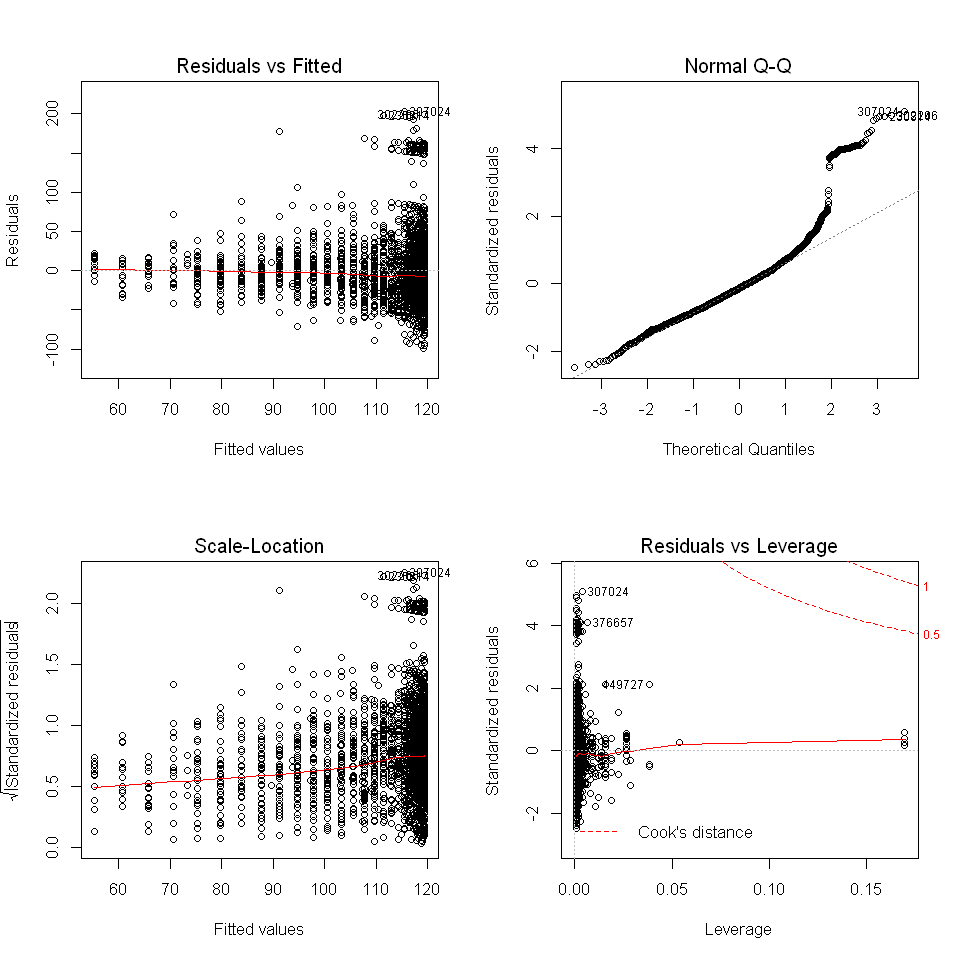

In [4]:
par(mfrow=c(2,2))
plot(fit)

Residuals and standard errors seems to normally distributed around the 0 which indicates that there is no need for any type of data transformation. Next, let's use hypothesis testing and find out which model is better using `anova()` function. This function enables us to compare the significance of all models up to including the polynomial of degree 5.

In [5]:
fit.1 = lm(wage∼age, data=Wage)
fit.2 = lm(wage∼poly(age, 2), data=Wage)
fit.3 = lm(wage∼poly(age, 3), data=Wage)
fit.4 = lm(wage∼poly(age, 4), data=Wage)
fit.5 = lm(wage∼poly(age, 5), data=Wage)
anova(fit.1, fit.2, fit.3, fit.4, fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


If you notice the p-values for anova are almost identical to p-values resulting from the polynomial regression fit. We can observe that both of these tests indicate that the cubic model is sufficient to provide the best fit to the data. Next, let's use cross validation to find the best fit.

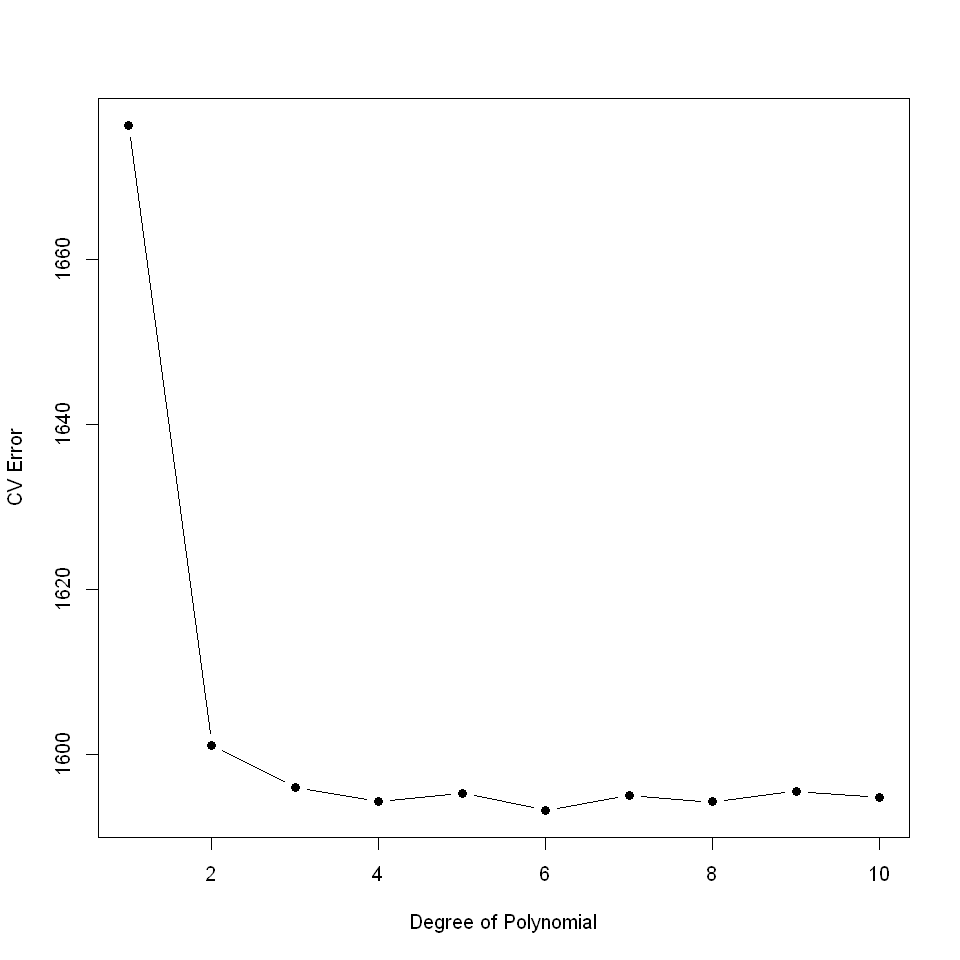

In [6]:
library(boot)
set.seed(10)
cv.error = rep(0, 10)
for (i in 1:length(cv.error)) {
    # fit the model
    lm.fit = glm(wage~poly(age, i), data=Wage)
    
    # save its cross validation error
    cv.error[i] = cv.glm(Wage, lm.fit, K=10)$delta[1]
}

plot(1:length(cv.error), cv.error, pch=19, type="b", xlab="Degree of Polynomial", ylab="CV Error")

Cross validation results show us that the lowest error occurs starting from 4th degree polynomial model, and the difference between the cubic and 4th degree pol. is not actually that large. Starting from 4 degree polynomial all the other models don't really add any performance benefit, thus choosing either cubic or 4th deg. pol. model is reasonable here.

Next, we will plot the fit both of our chosen models.

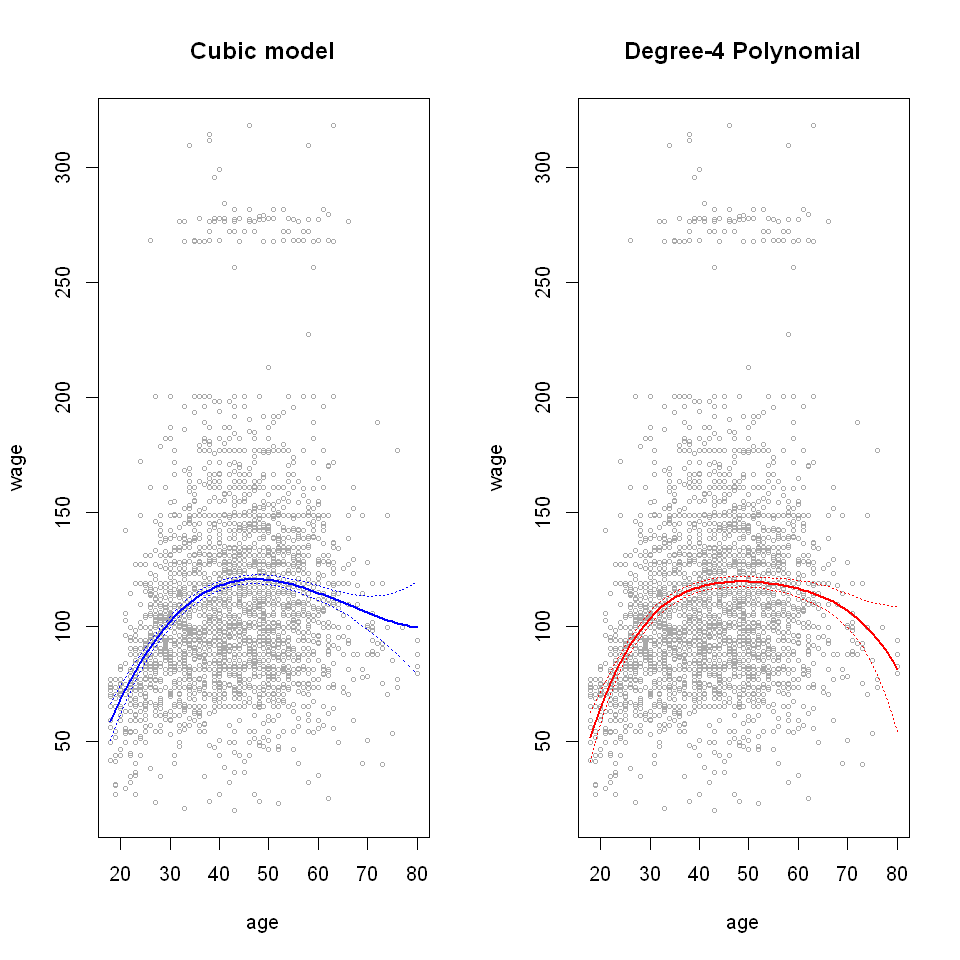

In [7]:
# create an age grid
agelims = range(age)
age.grid = seq(from=agelims[1], to=agelims[2])

# fit both models
fit3 = glm(wage~poly(age, 3), data=Wage)
fit4 = glm(wage~poly(age, 4), data=Wage)

# make predictions
preds3 = predict(fit3, newdata=list(age=age.grid), se=T)
preds4 = predict(fit4, newdata=list(age=age.grid), se=T)

# standard error bands for both models
se3.bands = cbind(preds3$fit+2*preds3$se.fit, preds3$fit-2*preds3$se.fit)
se4.bands = cbind(preds4$fit+2*preds4$se.fit, preds4$fit-2*preds4$se.fit)

# plot both models
par(mfrow=c(1,2))
plot(age, wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Cubic model")
lines(age.grid, preds3$fit, lwd=2, col="blue")
matlines(age.grid, se3.bands, lwd=1, col="blue", lty=3)

plot(age, wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Degree-4 Polynomial")
lines(age.grid, preds4$fit, lwd=2, col="red")
matlines(age.grid, se4.bands, lwd=1, col="red", lty=3)

### Step (b)

> Fit a step function to predict `wage` using `age`, and perform crossvalidation to choose the optimal number of cuts. Make a plot of the fit obtained.

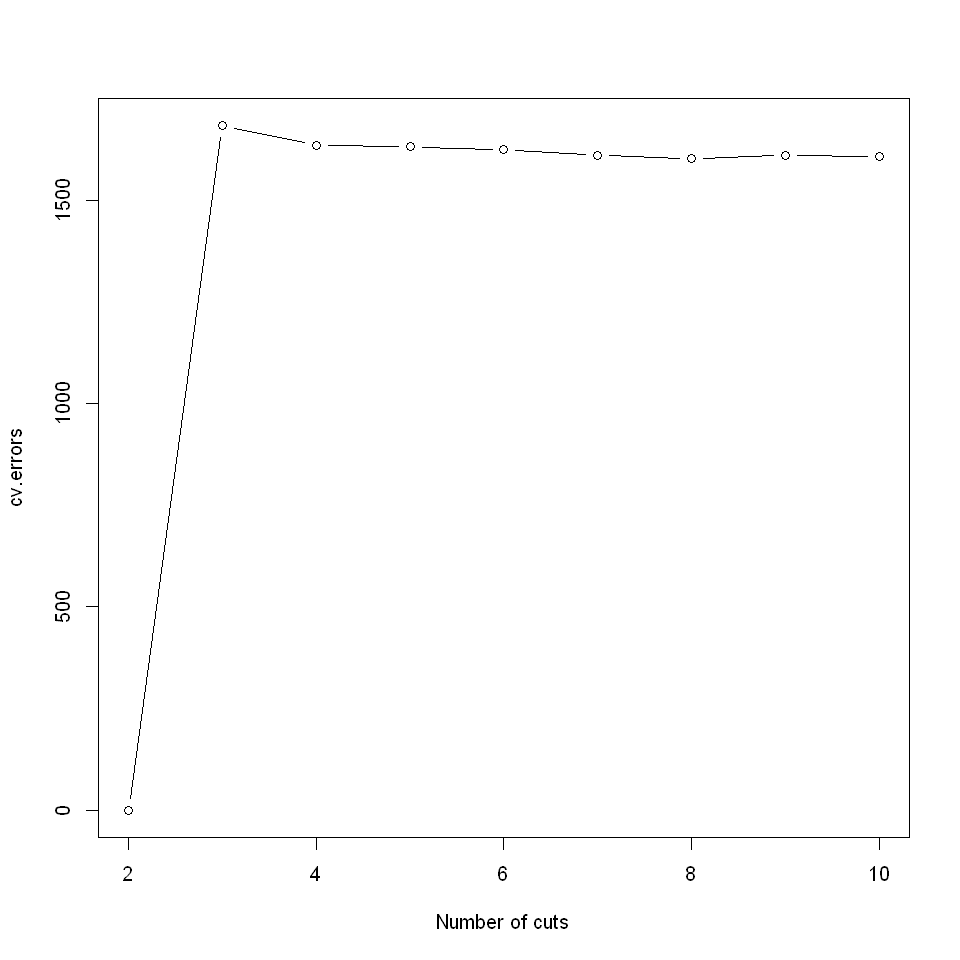

In [8]:
cv.errors = rep(0, 9)
for (i in 2:length(cv.errors)+1) {
    Wage$age.cut = cut(age, i)
    glm.fit = glm(wage~age.cut, data=Wage)
    cv.errors[i-1] = cv.glm(Wage, glm.fit, K=10)$delta[1]
}
plot(2:10, cv.errors, type="b", xlab="Number of cuts")

Based on the plot above, we can see that the optimal number of cuts is 8. We will make a plot of the fit obtained using 8 cuts.

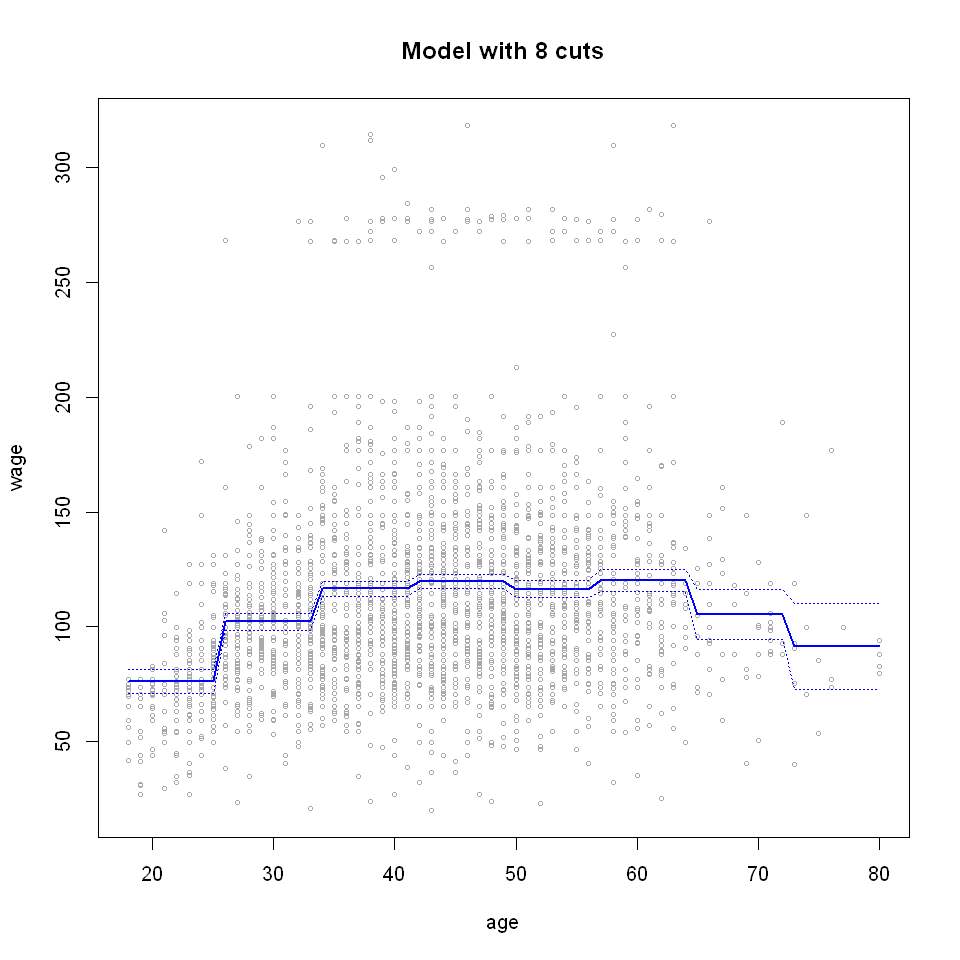

In [9]:
# fit, predict and generate standard error bands
fit.cut = glm(wage~cut(age, 8), data=Wage)
preds.cut = predict(fit.cut, newdata=list(age=age.grid), se=T)
se.bands = preds.cut$fit + cbind(2*preds.cut$se.fit, -2*preds.cut$se.fit)

# plot the model
plot(age, wage, xlim=agelims, cex=0.5, col="darkgrey")
title("Model with 8 cuts")
lines(age.grid, preds.cut$fit, lwd=2, col="blue")
matlines(age.grid, se.bands, lwd=1, col="blue", lty=3)

## Exercise 9

This question uses the variables `dis` (the weighted mean of distances to five Boston employment centers) and `nox` (nitrogen oxides concentration in parts per 10 million) from the `Boston` data. We will treat `dis` as the predictor and `nox` as the response.

### Step (a)

> Use the `poly()` function to fit a cubic polynomial regression to predict `nox` using `dis`. Report the regression output, and plot the resulting data and polynomial fits.

Let's first explore our predictor and the response.

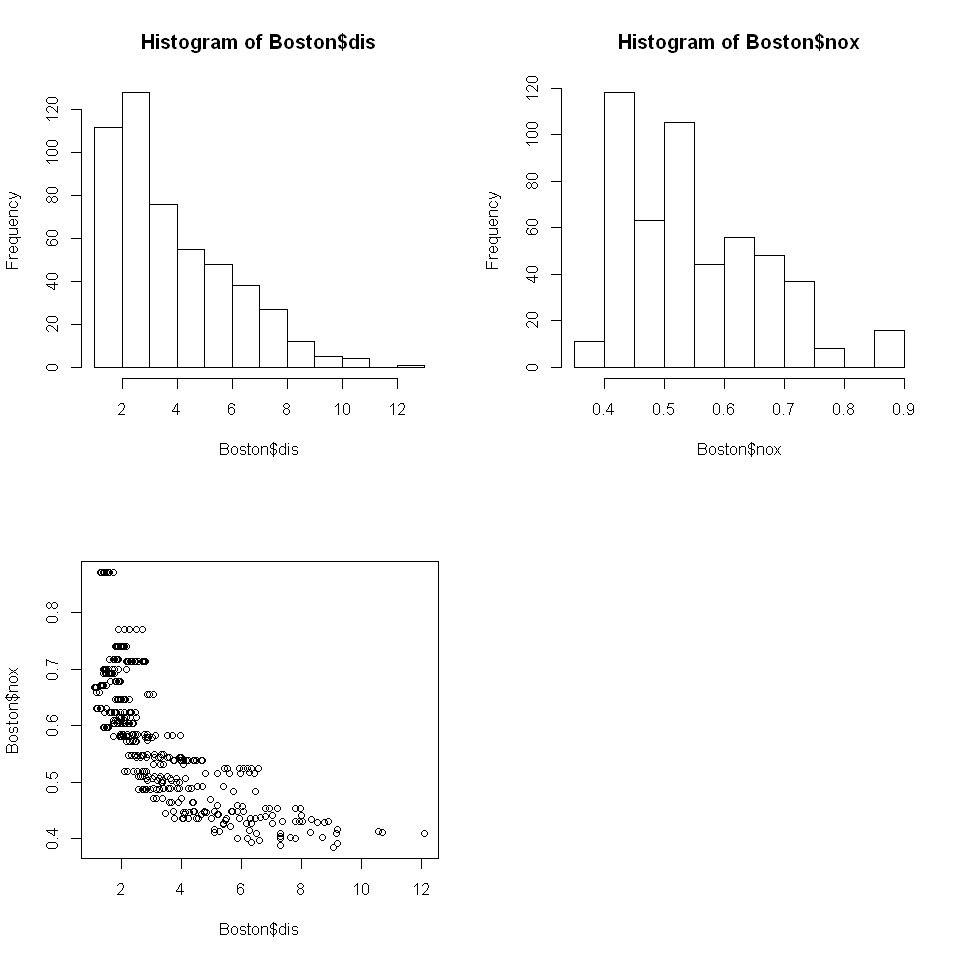

In [10]:
library(MASS)
par(mfrow=c(2,2))
hist(Boston$dis)
hist(Boston$nox)
plot(Boston$dis, Boston$nox)

From the scatter plot, its possible to observe a polynomial relationship, and we will use cubic polynomial to fit the data.

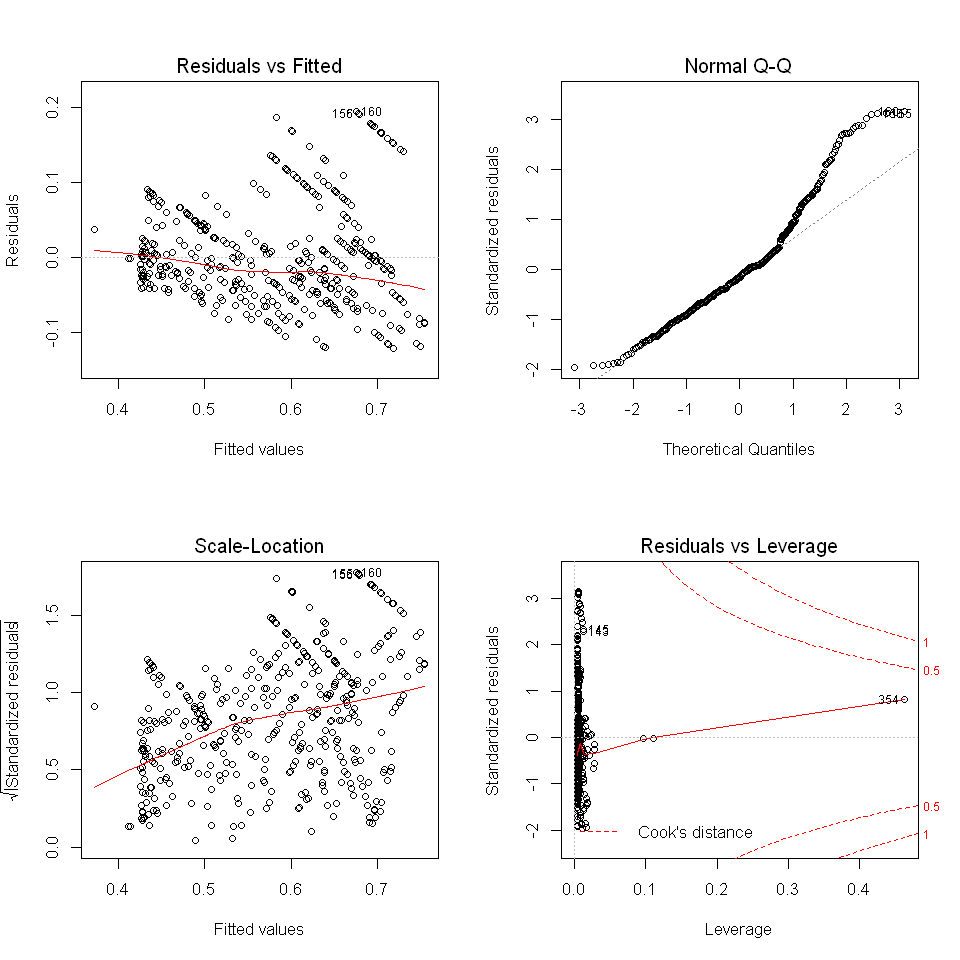

In [11]:
bost.fit = lm(nox~poly(dis, 3), data=Boston)
par(mfrow=c(2,2))
plot(bost.fit)

We can observe that residuals are more or less normally distributed around 0. Let's review the summary of the cubic polynomial model fit.

In [12]:
summary(bost.fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


We can observe that all estimators are significant.

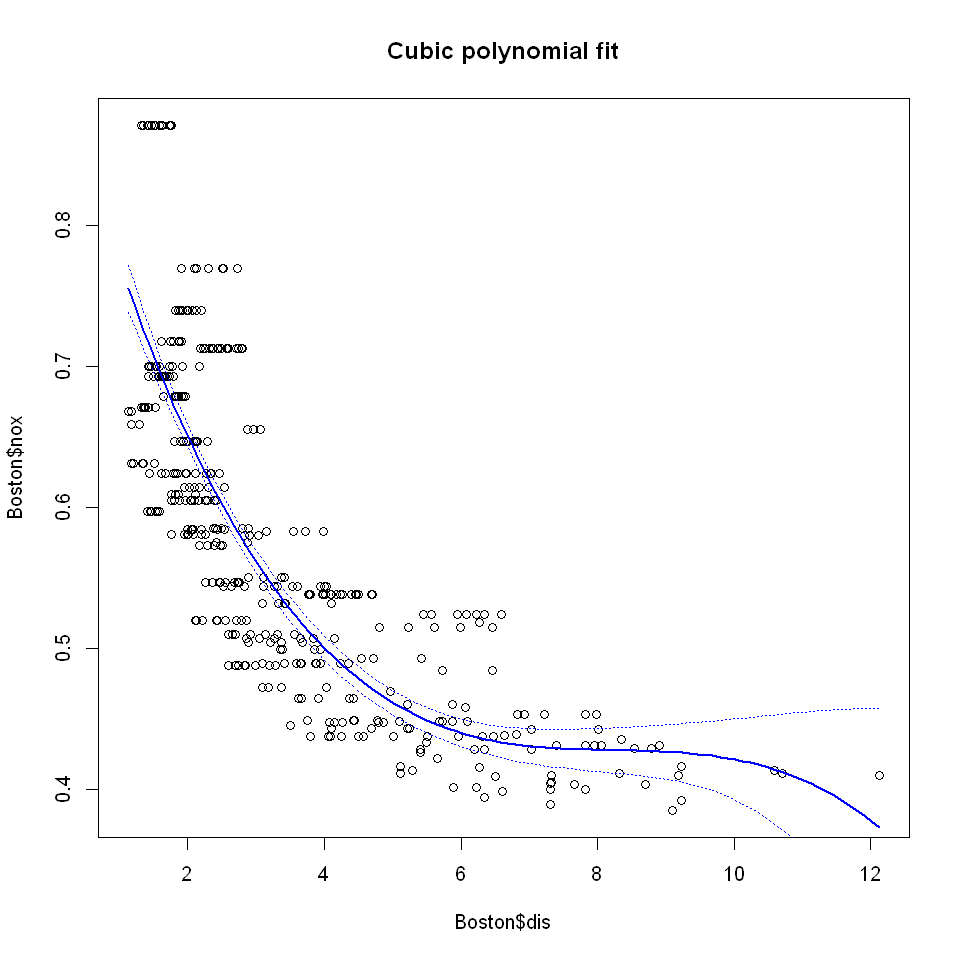

In [13]:
# generate range of values for dis
dislims = range(Boston$dis)
dis.grid = seq(from=dislims[1], to=dislims[2], length.out = 100)

# make predictions based on the fit and get standard errors
bost.preds = predict(bost.fit, newdata=list(dis=dis.grid), se=T)
bost.se.bands = bost.preds$fit + cbind(2*bost.preds$se.fit, -2*bost.preds$se.fit)

# plot the data and fit
plot(Boston$dis, Boston$nox)
lines(dis.grid, bost.preds$fit, lwd=2, col="blue")
matlines(dis.grid, bost.se.bands, lwd=1, col="blue", lty=3)
title("Cubic polynomial fit")

### Step (b)

> Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

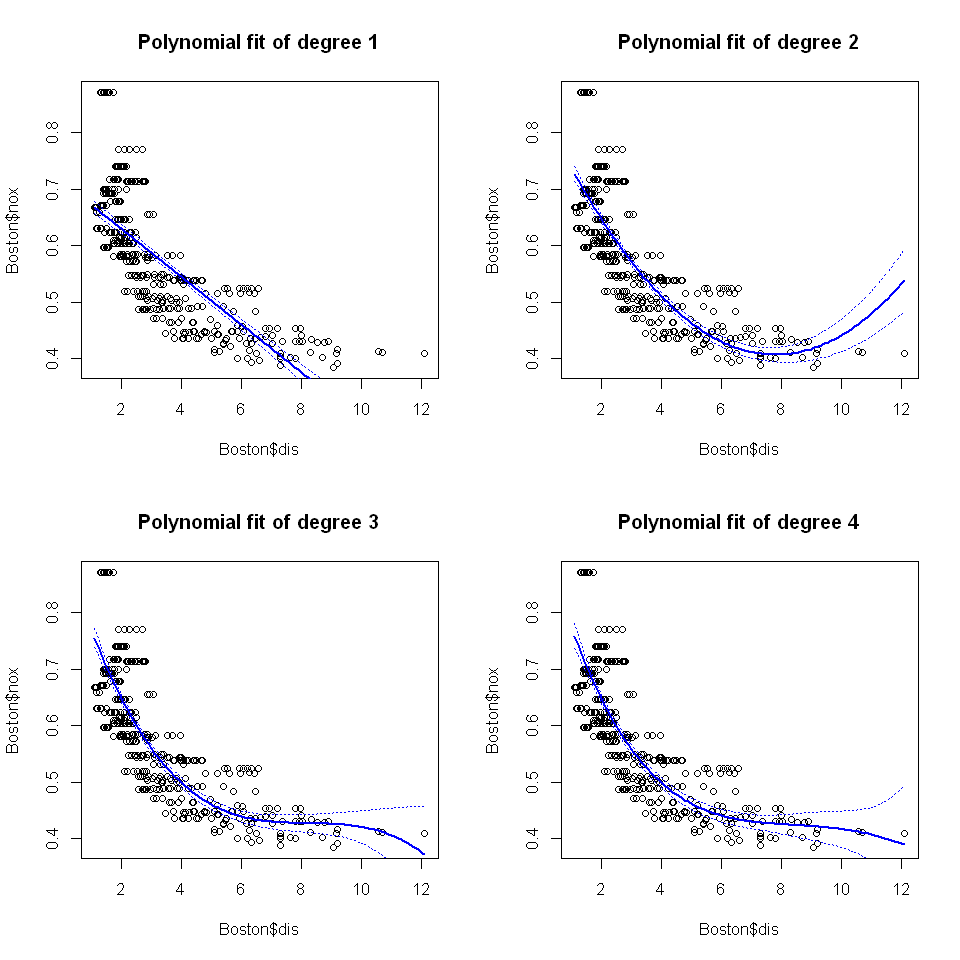

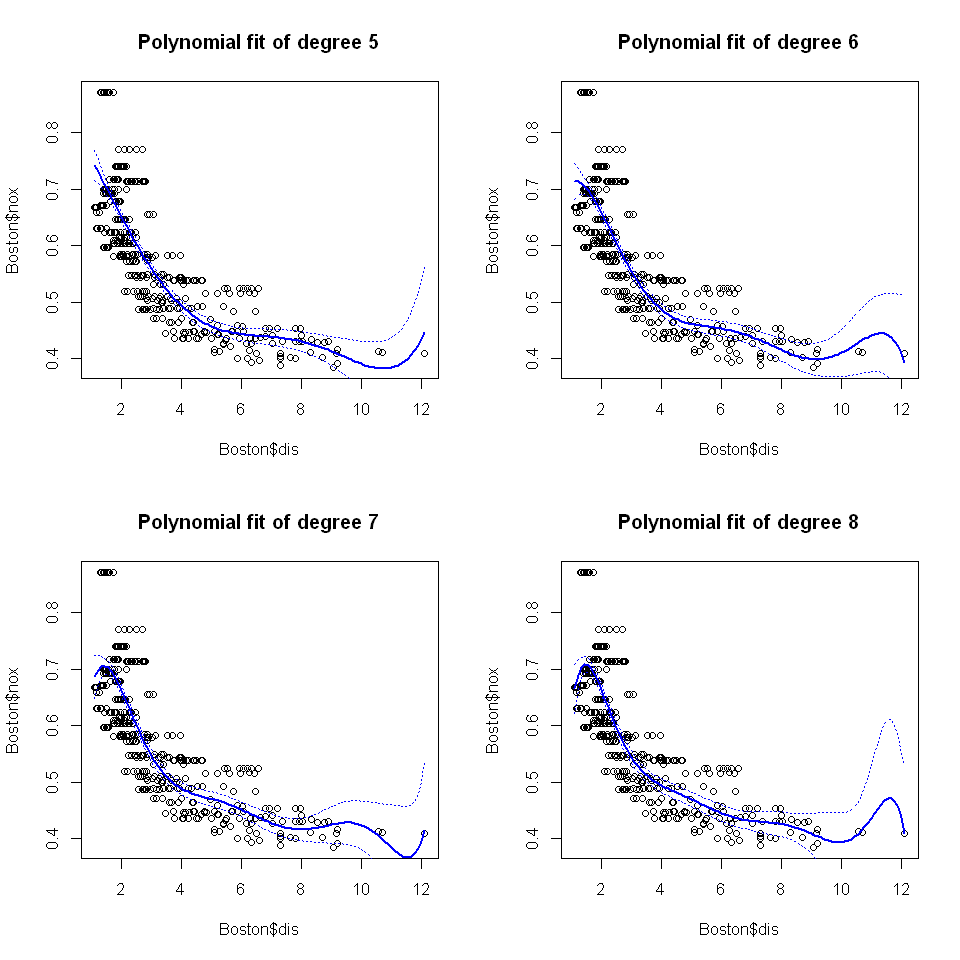

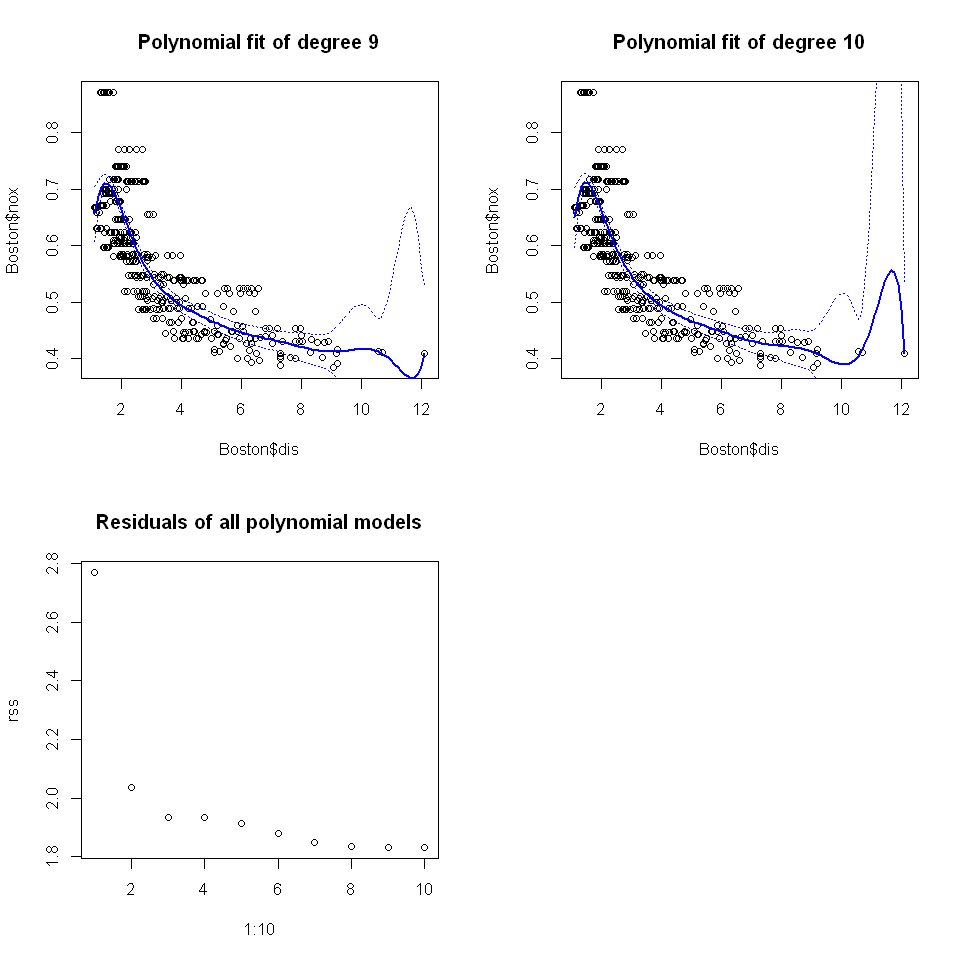

In [14]:
par(mfrow=c(2,2))

rss = rep(0, 10)
# generate all models and plot them as we iterate
for (i in 1:length(rss)) {
    
    # fit the model, make predictions and get standard errors
    model.fit = lm(nox~poly(dis, i), data=Boston)
    preds = predict(model.fit, newdata=list(dis=dis.grid), se=T)
    se.bands = preds$fit + cbind(2*preds$se.fit, -2*preds$se.fit)
    
    # save rss value
    rss[i] = sum(model.fit$residuals^2)
    
    # plot the model
    plot(Boston$dis, Boston$nox)
    lines(dis.grid, preds$fit, lwd=2, col="blue")
    matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)
    title(paste("Polynomial fit of degree", i))
}

# plot the residual sum of squares
plot(1:10, rss)
title("Residuals of all polynomial models")

We can observe that models 4th or 5th degree polynomial are performing already quite well since the rss is below 2. Compared to other models degree 8,9,10 perform very well but in regards to complexity they introduce a lot of complexity as well uncertainty towards the end, because standard errors are way high towards `dis` values of 10-12

### Step (c)

> Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results

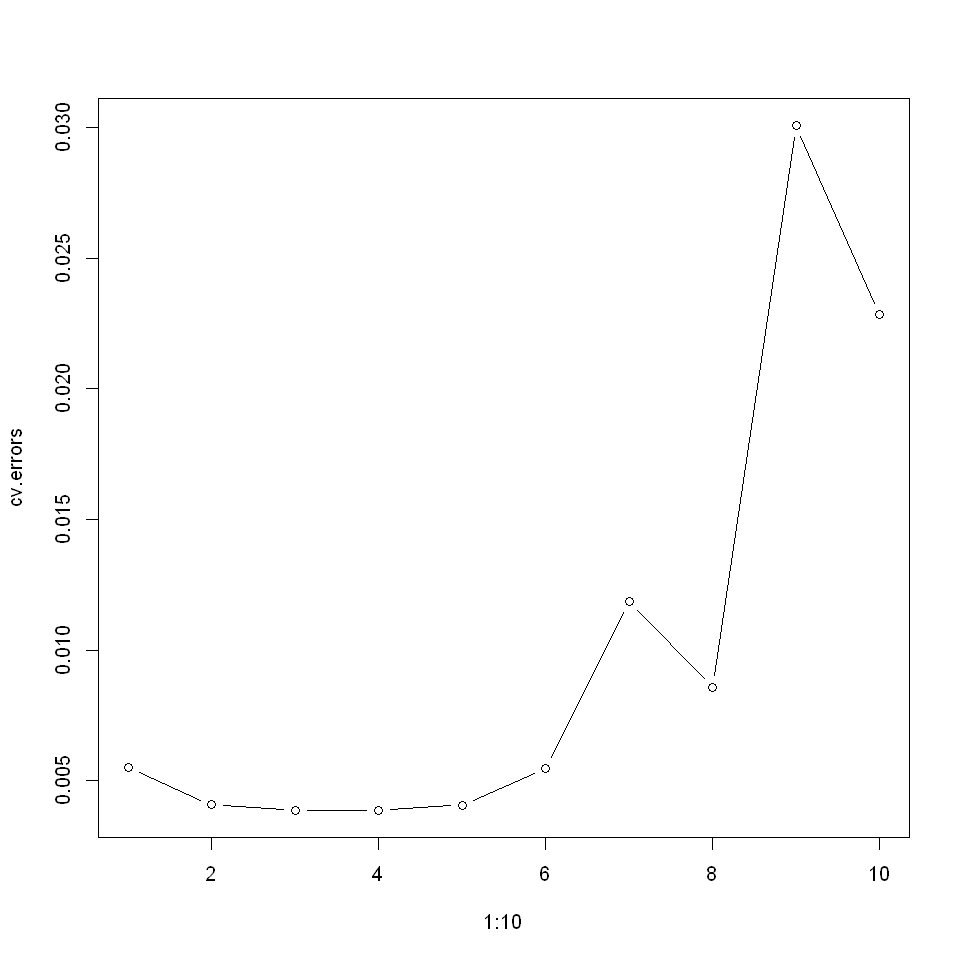

In [15]:
cv.errors = rep(0, 10)
for (i in 1:length(cv.errors)) {
    glm.fit = glm(nox~poly(dis, i), data=Boston)
    cv.errors[i] = cv.glm(Boston, glm.fit, K=10)$delta[1]
}
plot(1:10, cv.errors, type="b")

There is an interest result we can observe. The more complex models with higher than 6 degree of polynomial have quite large cross validation errors, which indicates that these models are very unstable. From the above, cubic and 4th degree polynomial models seem to be the most optimal ones.

### Step (d)

> Use the `bs()` function to fit a regression spline to predict `nox` using `dis`. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

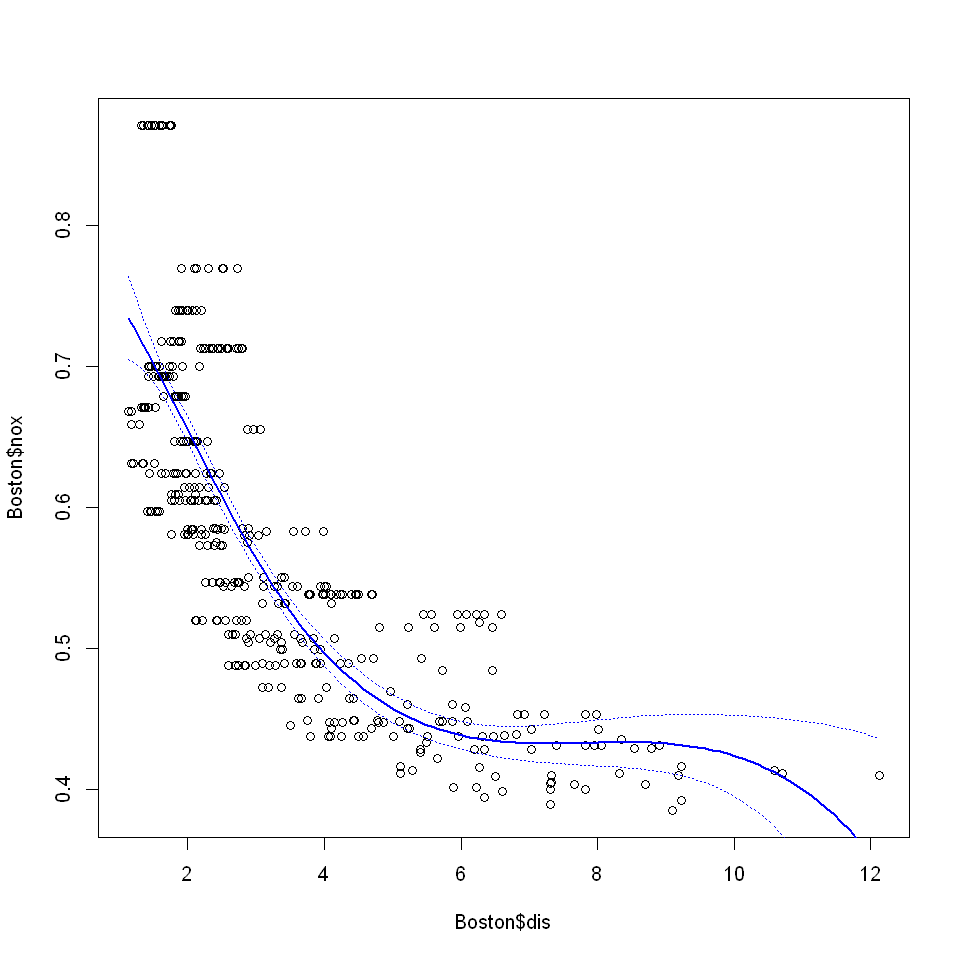

In [16]:
library(splines)

# fit model, make predictions and se bands
spline.fit = lm(nox~bs(dis, df=4), data=Boston)
spline.preds = predict(spline.fit, newdata=list(dis=dis.grid), se=T)
se.bands = spline.preds$fit + cbind(2*spline.preds$se.fit, -2*spline.preds$se.fit)

# plot
plot(Boston$dis, Boston$nox)
lines(dis.grid, spline.preds$fit, lwd=2, col="blue")
matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)

The choice of knots is as usual is a bit tricky. The choice of knots here is by default.

### Step (e)

> Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

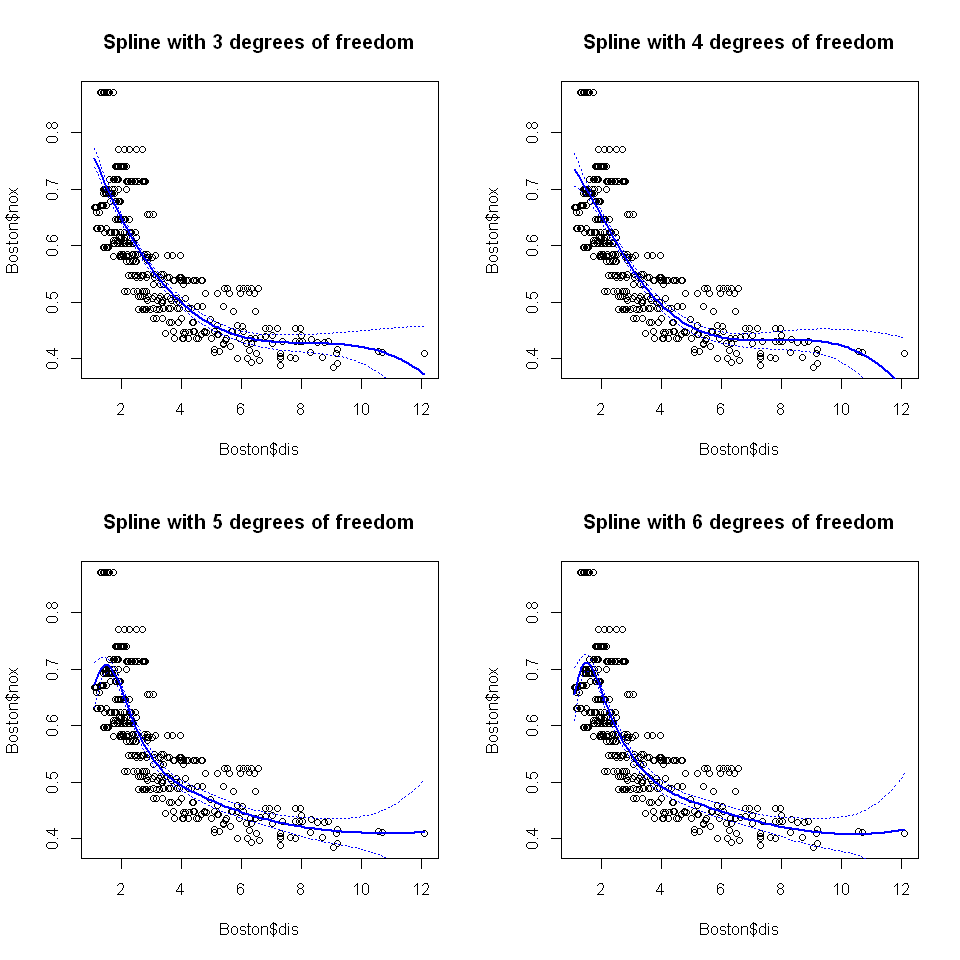

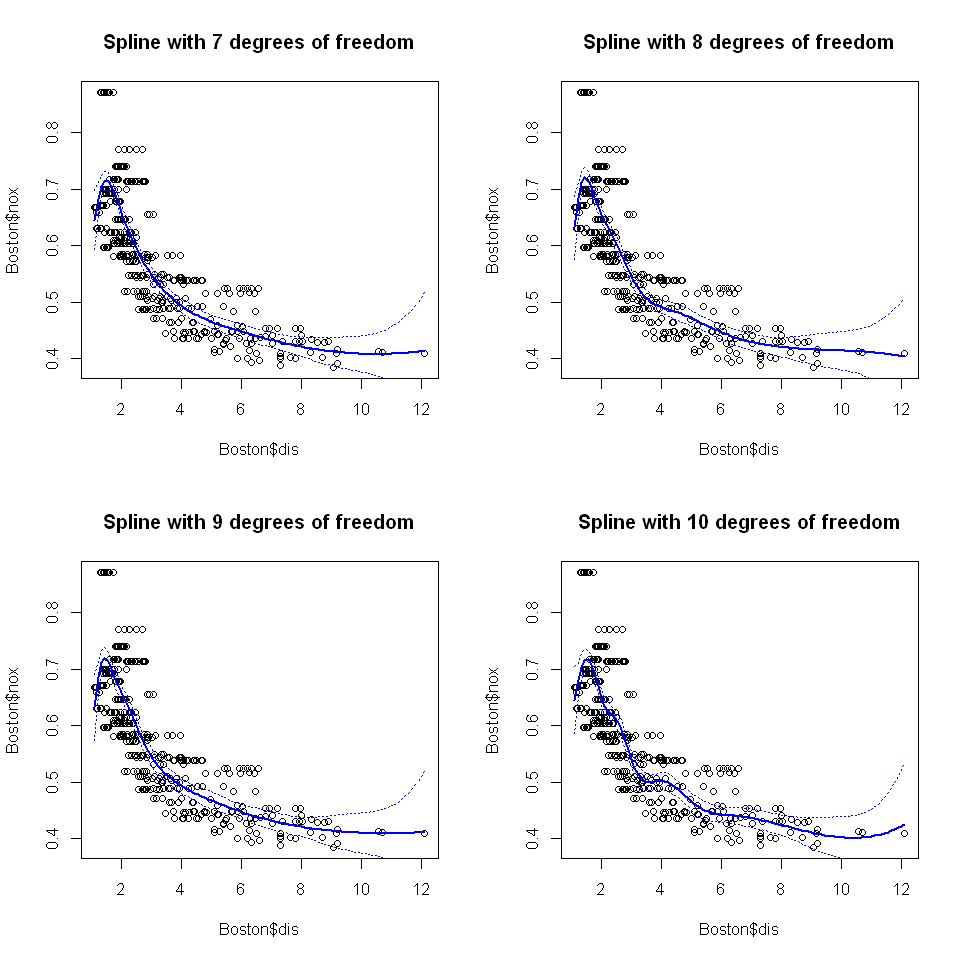

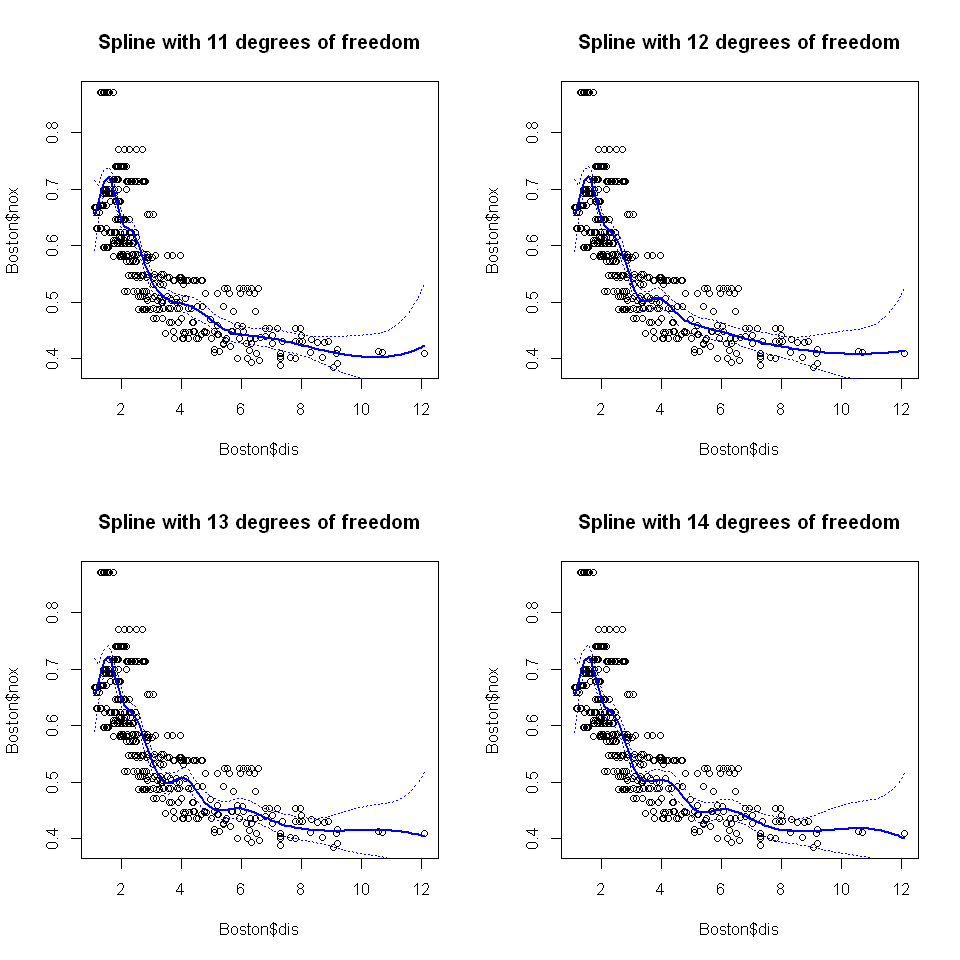

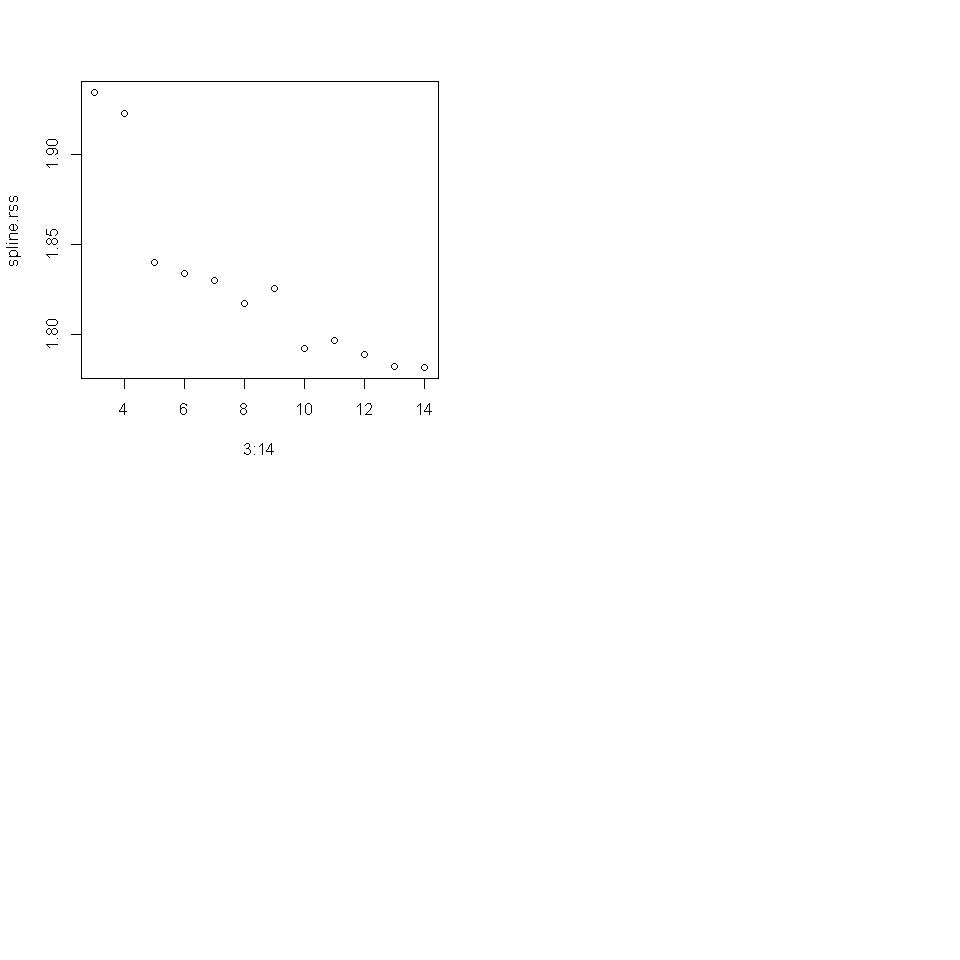

In [17]:
par(mfrow=c(2, 2))
spline.rss = rep(0, 12)
for (i in 3:14) {
    
    # fit model, make predictions and se bands
    spline.fit = lm(nox~bs(dis, df=i), data=Boston)
    spline.preds = predict(spline.fit, newdata=list(dis=dis.grid), se=T)
    se.bands = spline.preds$fit + cbind(2*spline.preds$se.fit, -2*spline.preds$se.fit)
    
    # plot results
    plot(Boston$dis, Boston$nox)
    title(paste("Spline with", i, "degrees of freedom"))
    lines(dis.grid, spline.preds$fit, lwd=2, col="blue")
    matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)
    
    # save rss
    spline.rss[i-2] = sum(spline.fit$residuals^2)
}

# plot rss
plot(3:14, spline.rss)

First of all minimum df we can use is 3 and maximum here we define as 14 included, in order to obtain 12 results. We can observe that the RSS significantly decreseas when degrees of freedom is more than 8. We can further investigate in order to find out the optimal degrees of freedom by performing cross validation. It's also possible to observe from the above that more degrees of freedom means higher overfitting on the data. Despite having a low RSS our test dataset won't perform as good due to overfitting.

### Step (f)

> Perform cross-validation or another approach in order to select the best degrees of freedom for a regression spline on this data. Describe your results.

Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1691, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = numeric(0), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1423), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.1423), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, d

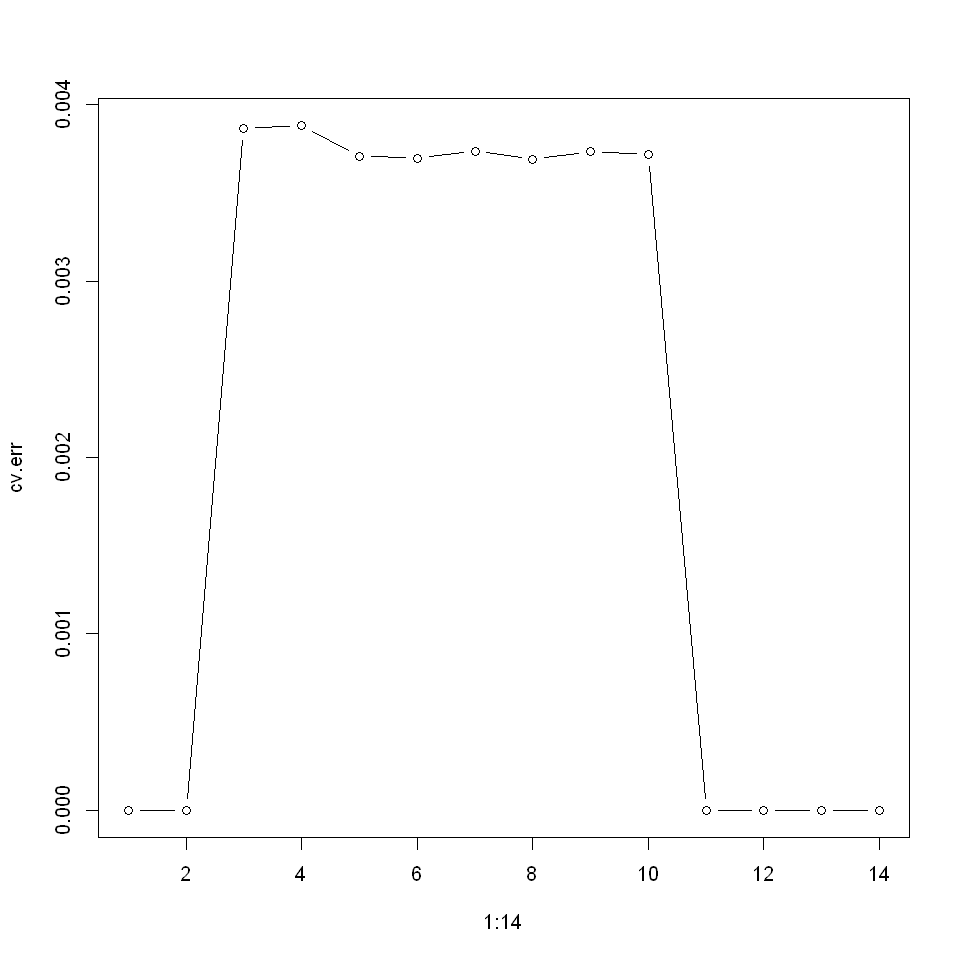

In [18]:
cv.err = rep(0, 14)
for (i in 3:length(cv.errors)) {
    glm.fit = glm(nox~bs(dis, df=i), data=Boston)
    cv.err[i] = cv.glm(Boston, glm.fit, K=10)$delta[1]
}
plot(1:14, cv.err, type="b")

## Exercise 10

This question relates to the `College` data set.

### Step (a)

> Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors, perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.

First, let's get acquainted with our dataset.

In [19]:
head(College)

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55


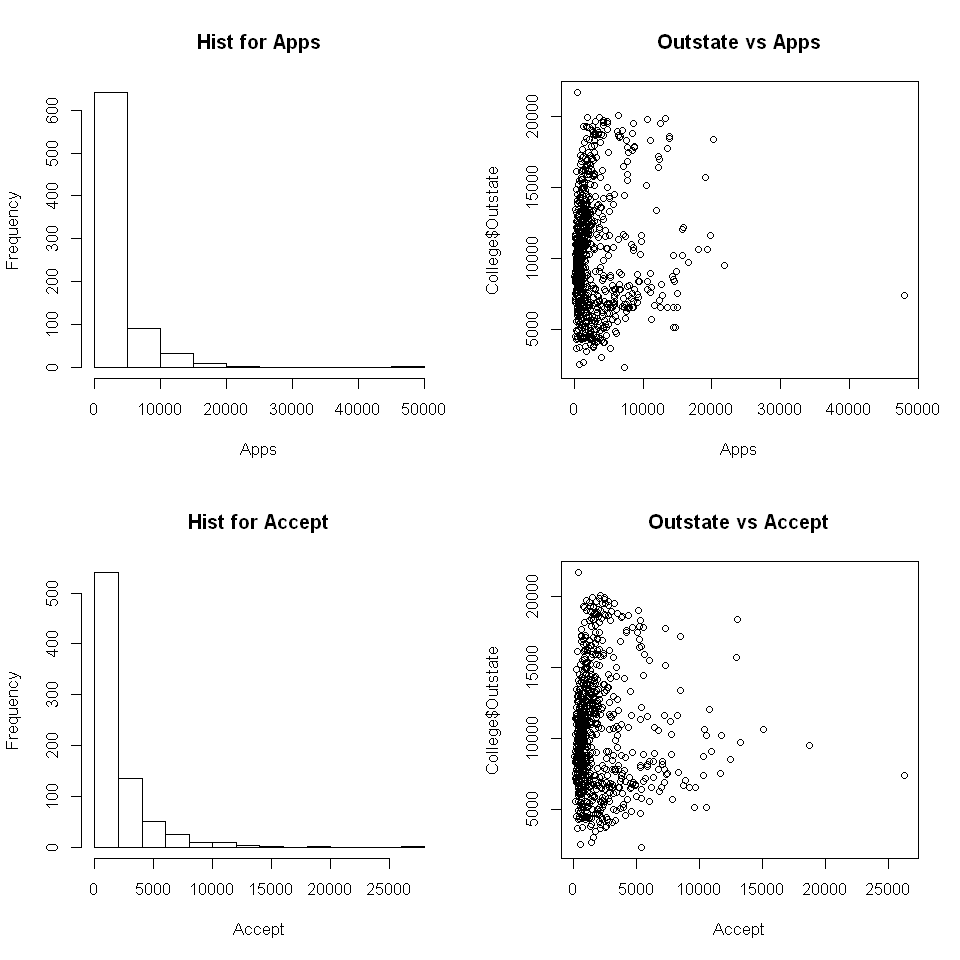

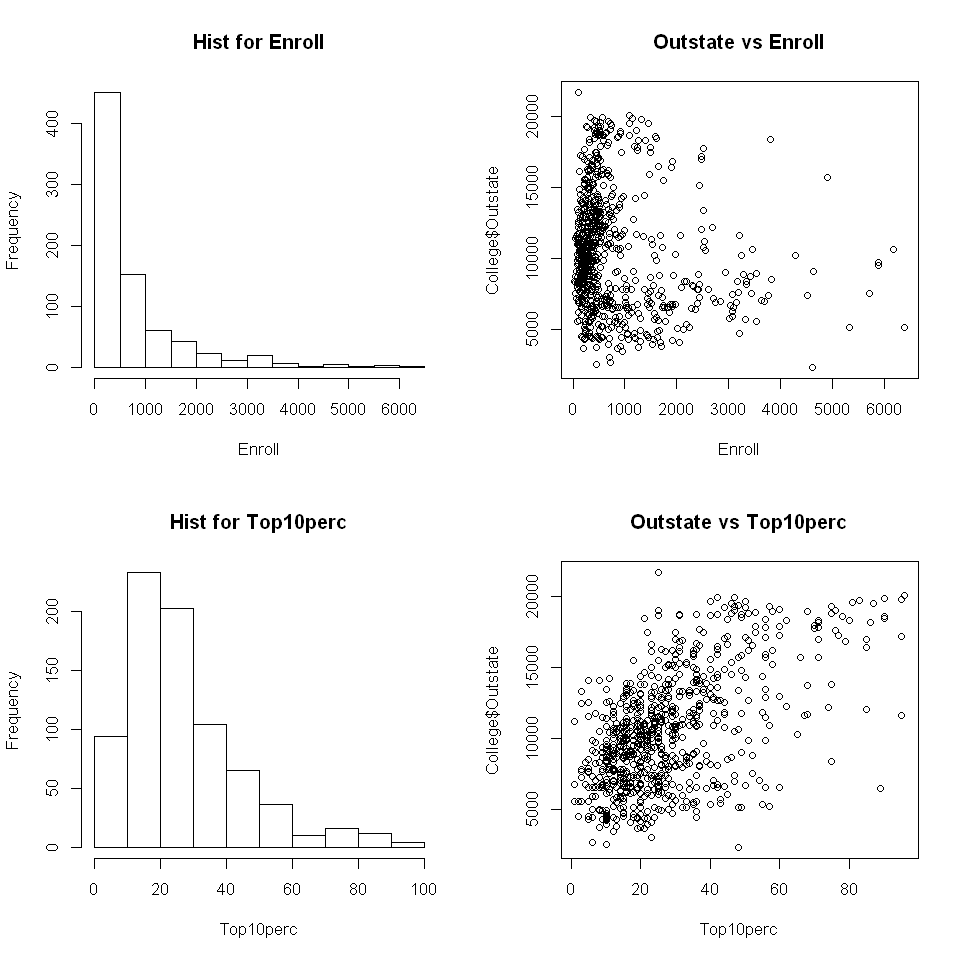

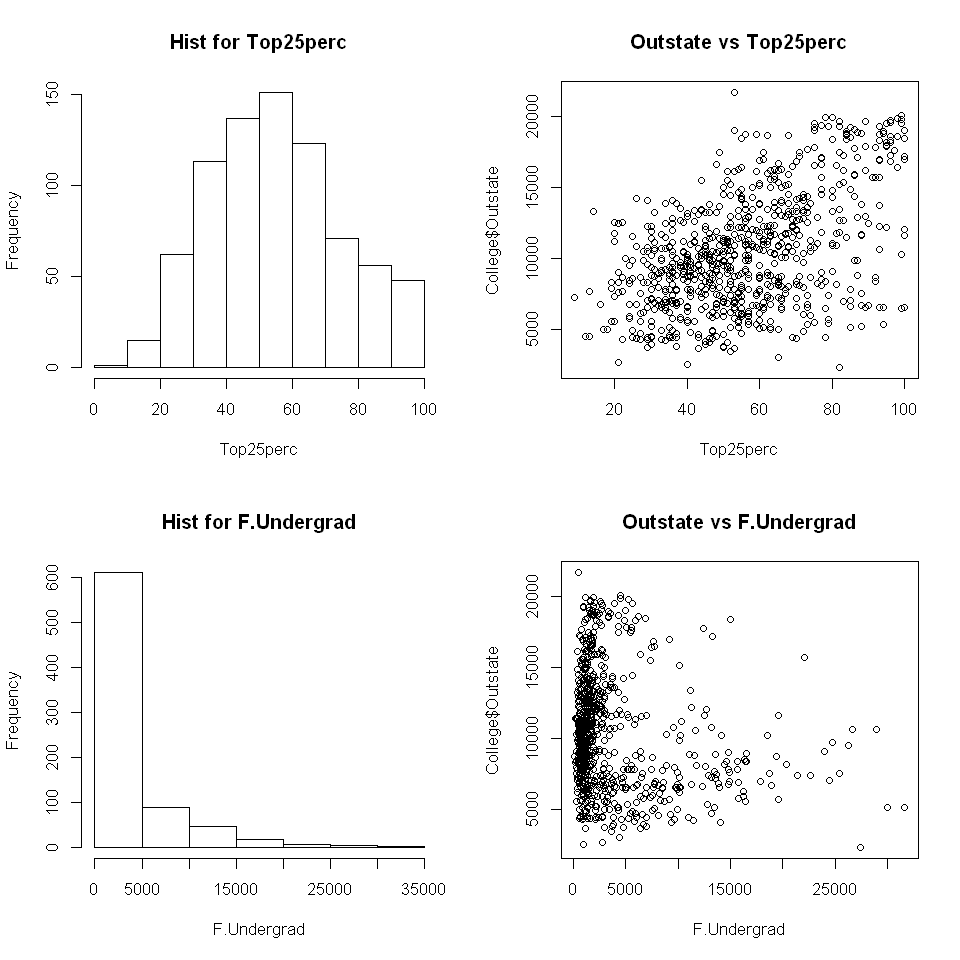

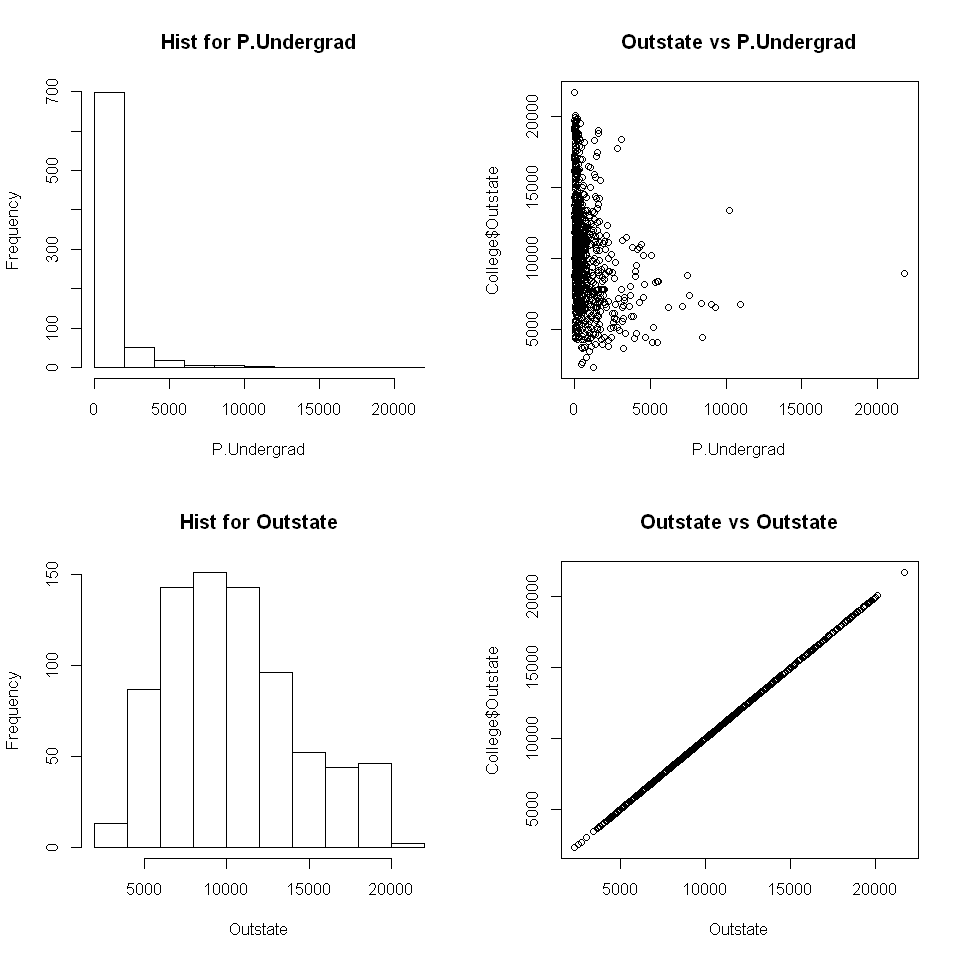

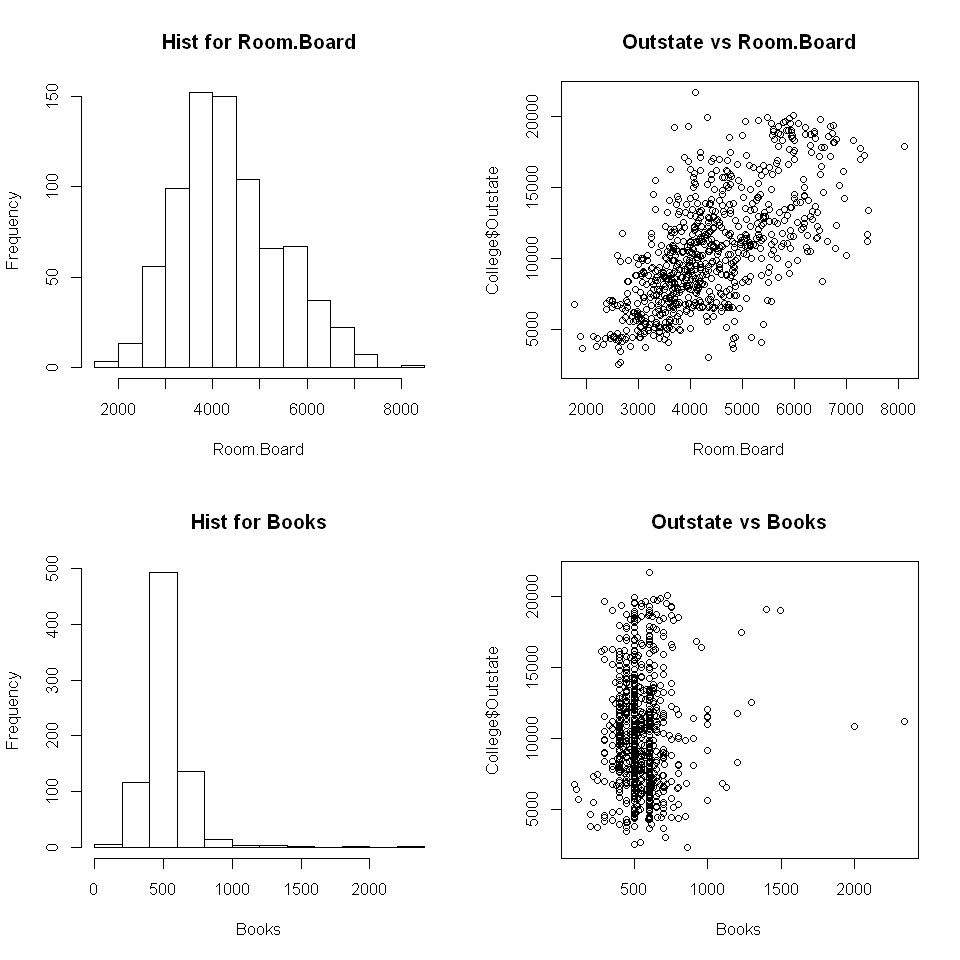

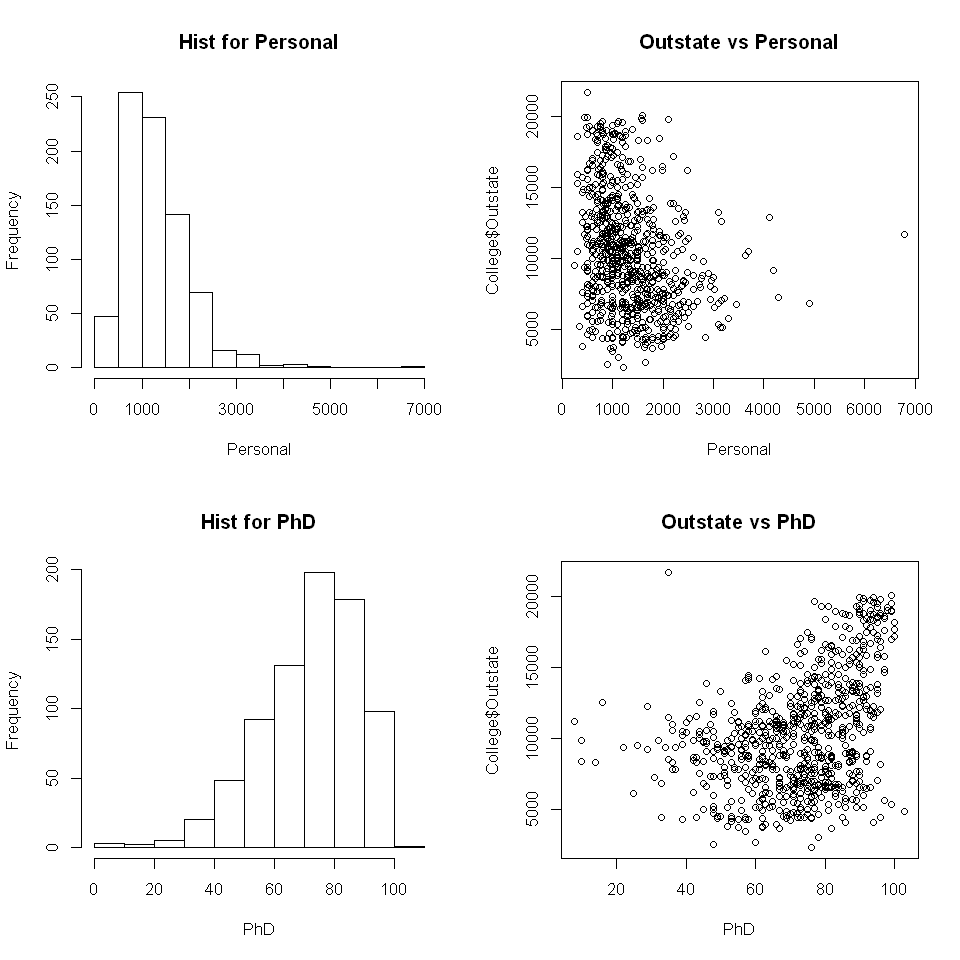

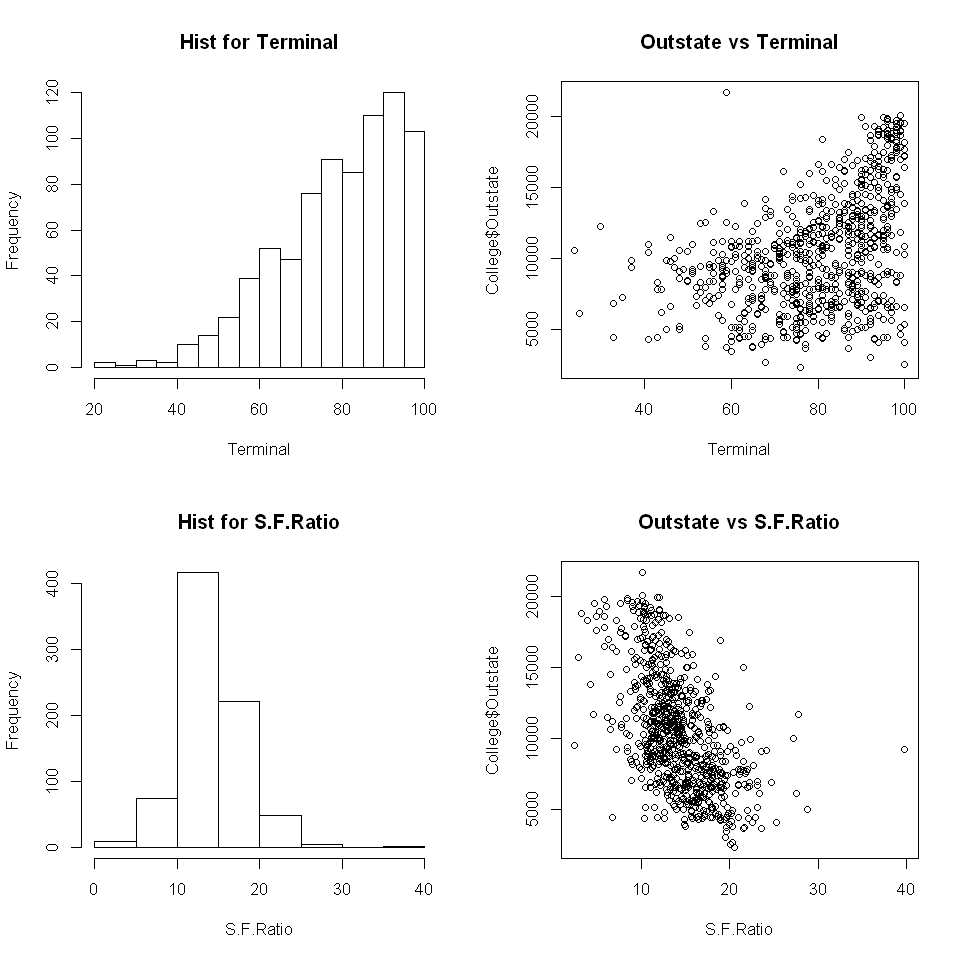

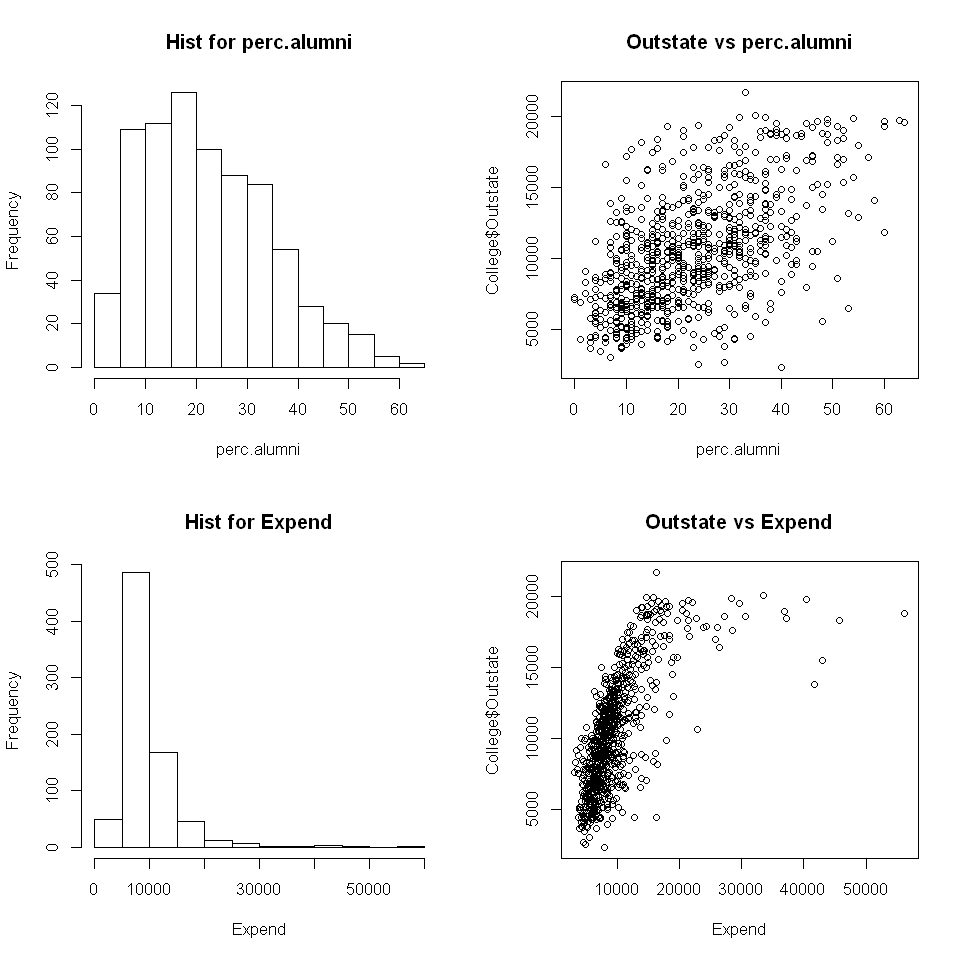

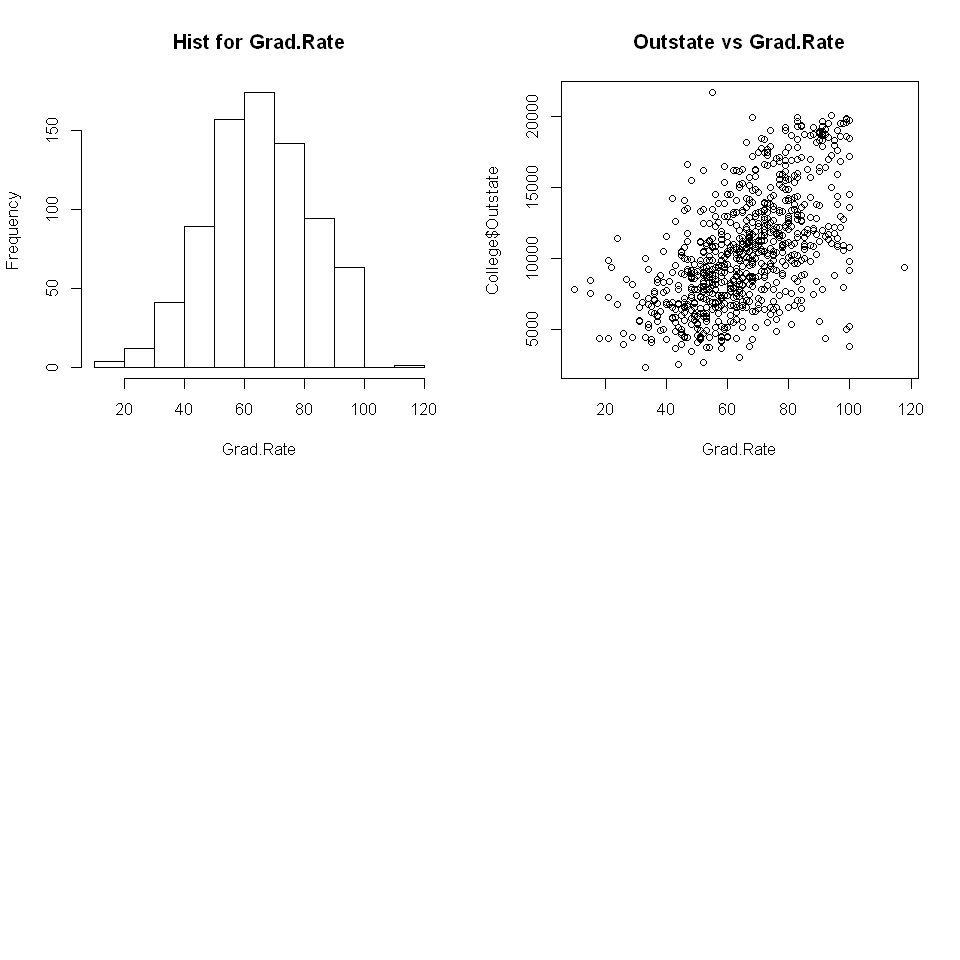

In [20]:
par(mfrow=c(2,2))
for (val in names(College)[-1]) {
    hist(College[, val], main=paste("Hist for", val), xlab=val)
    plot(College[, val], College$Outstate, main=paste("Outstate vs", val), xlab=val)
}

We can see here that all of our features have either a skewed distribution or a normal distribution. From various scatter plots we can right away observe that some of our predictos have a nice linear relationship, some have a some sort of polynomial relationship, while very few have a constant relationship.

Next, let's perform forward step-wise selection in order to identify the best subset of variables that would predict `Outstate` the best.

In [21]:
# divide data into train and test
set.seed(10)
train=sample(c(TRUE, FALSE), nrow(Hitters), rep=TRUE, prob=c(0.7, 0.3))
test=(!train)

In [22]:
# load library necessary for our subsets
library(leaps)

# generate best subsets in forward stepwise selection
fwd.best = regsubsets(Outstate~., data=College[train,], nvmax=17, method="forward")

# review
summary(fwd.best)

Warning message:
"package 'leaps' was built under R version 3.5.3"

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = College[train, ], nvmax = 17, 
    method = "forward")
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: forward
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  "*"        " "  " "    " "    " "   

We will use various measures in order to identify the best subset of variables. First let's use $C_p$, $BIC$ and $adjusted R^2$ to analyze the subsets.

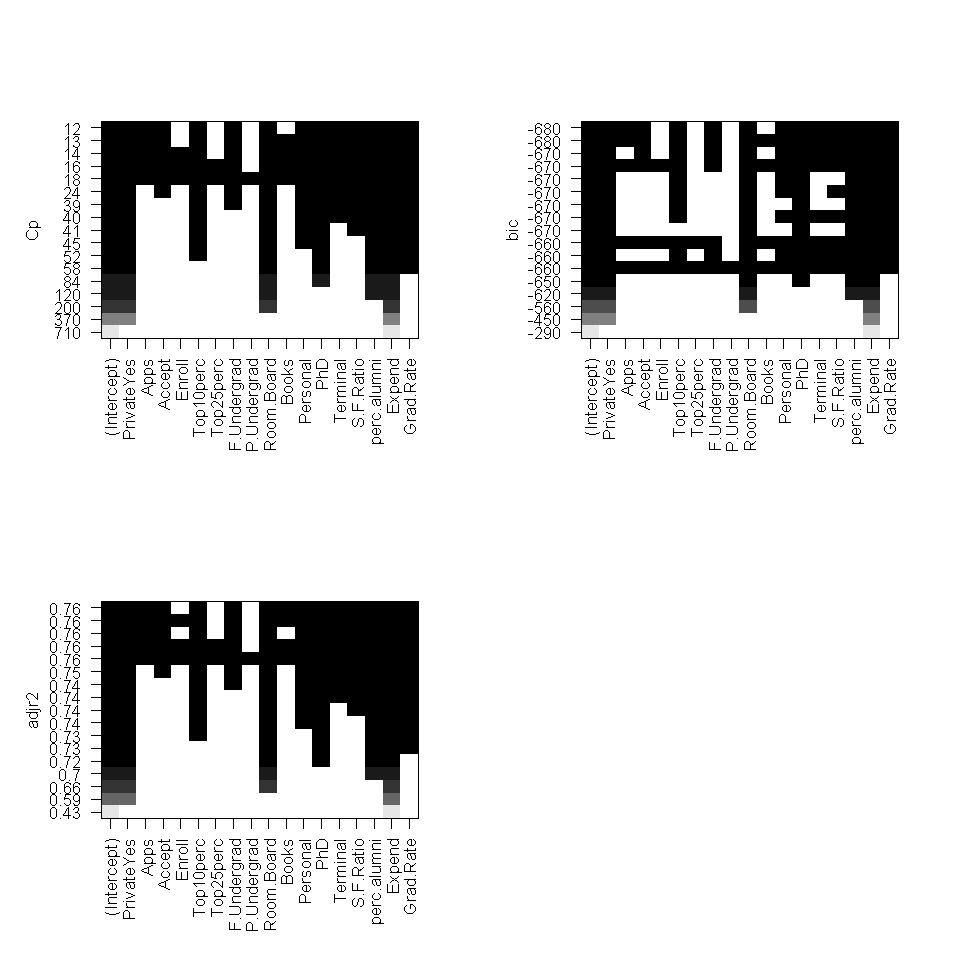

In [23]:
par(mfrow=c(2,2))
plot(fwd.best, scale="Cp")
plot(fwd.best, scale="bic")
plot(fwd.best, scale="adjr2")

Our results above show us which are the best combination of variables for a given number. We can see from the above that the best one variable model is the one including `Expend` (Instructional expenditure per student). Out of all the models with differenet variable sets we can observe that mostly the 12, 13 variable models can explain most of the variability in the dataset (based on $adjusted R^2$, $C_p$ and $BIC$).

Based on forward selection we should choose the model with all the features except the following:
* `Enroll`
* `Top25perc`
* `P.Undergrad`
* `Terminal`
* `S.F.Ratio`

But before we move onto making a decision, we will use our test set to find out the test error each of these models achieve on our test set.

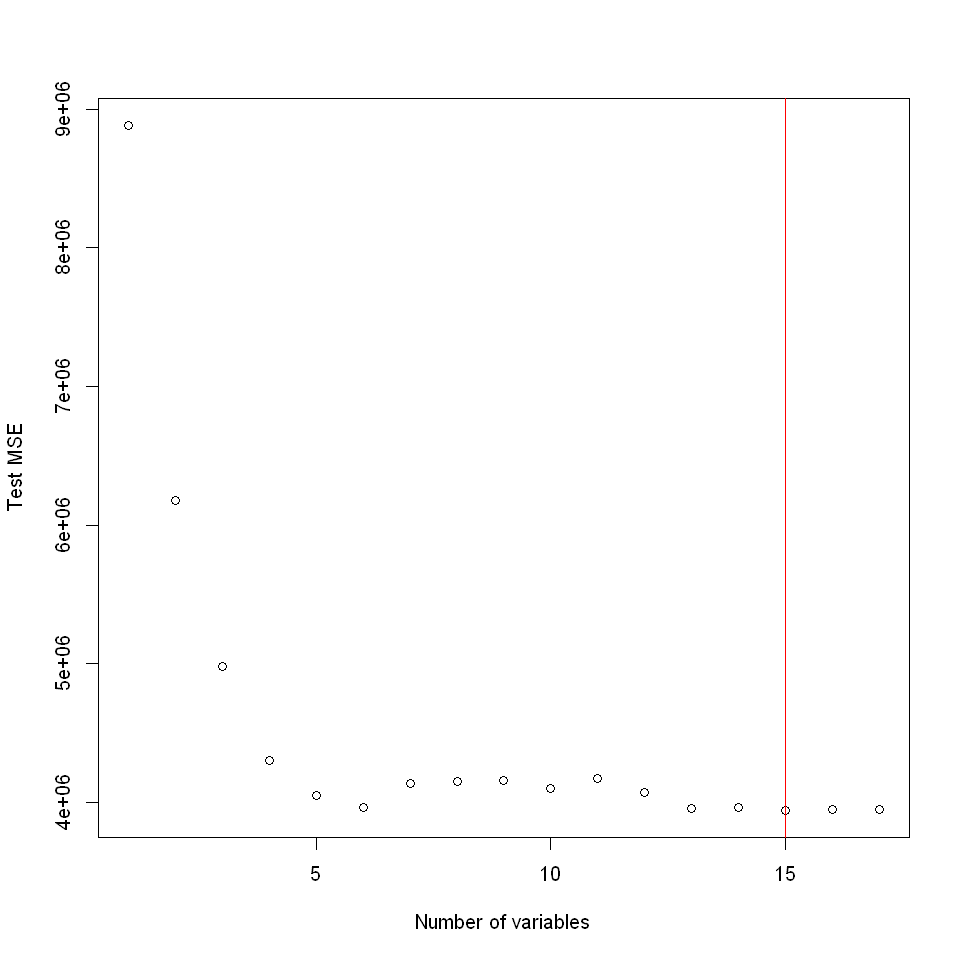

In [24]:
# number of models as a result of forward selection
nmodels = fwd.best$nvmax-1

# convert our data to matrix
testdata = model.matrix(Outstate~., data=College[test, ])

# populate 17 zeros since we have 17 models
test.errors = rep(0, nmodels)

# loop through each model
# make predictions and calculate test error
for (i in 1:nmodels) {
    coeffs = coef(fwd.best, id=i)
    preds = testdata[, names(coeffs)] %*% coeffs
    test.errors[i] = mean((College[test,]$Outstate - preds)^2)
}

# plot the results
plot(1:nmodels, test.errors, xlab="Number of variables", ylab="Test MSE")
abline(v = which.min(test.errors), col = "red")

In [25]:
# difference between these models is not large
test.errors[15]
test.errors[6]

[1] 3944788

[1] 3965141

We can observe that the smallest Test MSE is achieved by 15 variable model. Despite that we can also observe that the model with 6 variables, has almost the same Test MSE and is less complex. Thus we will proceed with choosing the set of features from the 6 variable model produced by forward selection.

In [51]:
# chosen model features
# we need to remove intercept and privateyes, snice they don't exist in original dataset
chosen.feat = names(coef(fwd.best, id=6))[-c(1,2)]

# filter the dataset, include target since we will use this set further on as main
College.fil = College[, c(chosen.feat, 'Private', 'Outstate')]

# check filtered dataframe
head(College.fil)

,Room.Board,PhD,perc.alumni,Expend,Grad.Rate,Private,Outstate
Abilene Christian University,3300,70,12,7041,60,Yes,7440
Adelphi University,6450,29,16,10527,56,Yes,12280
Adrian College,3750,53,30,8735,54,Yes,11250
Agnes Scott College,5450,92,37,19016,59,Yes,12960
Alaska Pacific University,4120,76,2,10922,15,Yes,7560
Albertson College,3335,67,11,9727,55,Yes,13500


### Step (b)

> Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.

In [56]:
library(gam)
gam.fit = gam(Outstate~s(Room.Board, df=4) + s(PhD, df=4) + s(perc.alumni, df=4) +
              s(Expend, df=4) + s(Grad.Rate, df=4) + Private, data=College)
summary(gam.fit)


Call: gam(formula = Outstate ~ s(Room.Board, df = 4) + s(PhD, df = 4) + 
    s(perc.alumni, df = 4) + s(Expend, df = 4) + s(Grad.Rate, 
    df = 4) + Private, data = College)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7495.50 -1121.84    33.03  1296.82  7843.45 

(Dispersion Parameter for gaussian family taken to be 3463360)

    Null Deviance: 12559297426 on 776 degrees of freedom
Residual Deviance: 2614837177 on 755.0001 degrees of freedom
AIC: 13928.58 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq  F value    Pr(>F)    
s(Room.Board, df = 4)    1 4432290141 4432290141 1279.766 < 2.2e-16 ***
s(PhD, df = 4)           1  264556425  264556425   76.387 < 2.2e-16 ***
s(perc.alumni, df = 4)   1 1561812859 1561812859  450.953 < 2.2e-16 ***
s(Expend, df = 4)        1 1213494324 1213494324  350.381 < 2.2e-16 ***
s(Grad.Rate, df = 4)     1  248927365  248927365   71.874 < 2.2e-16 ***
Private     

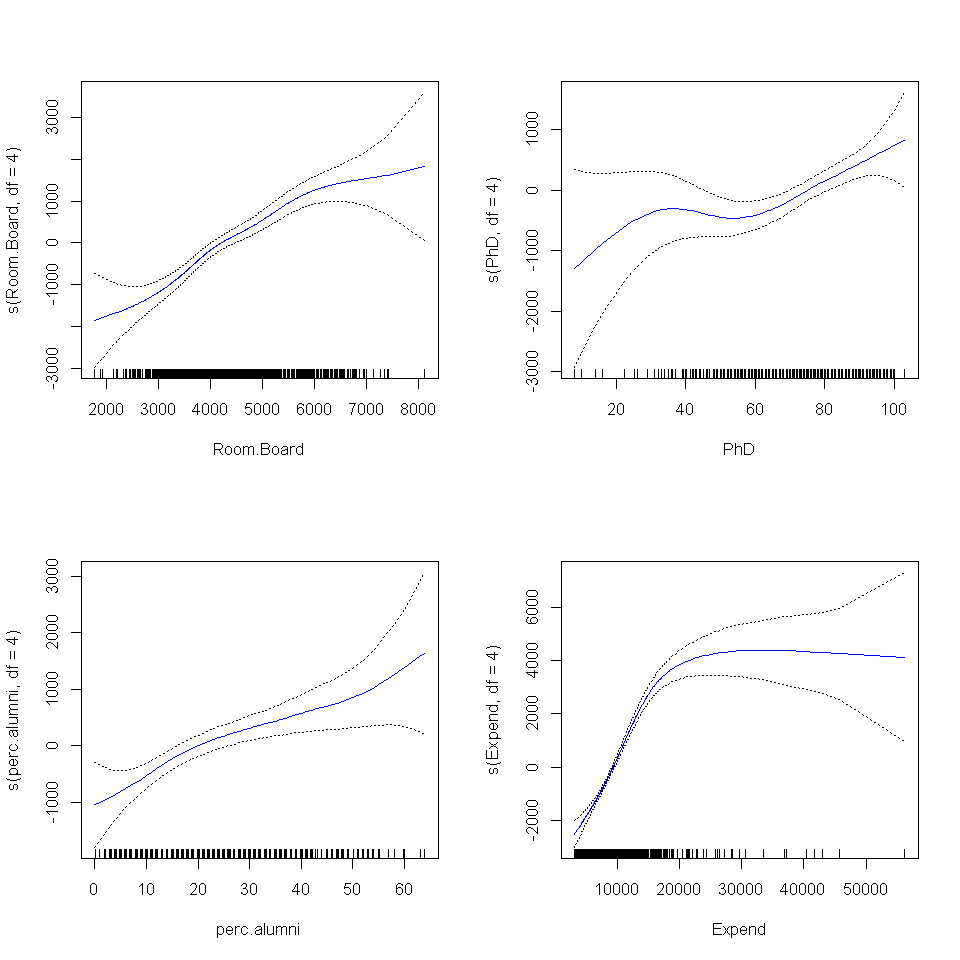

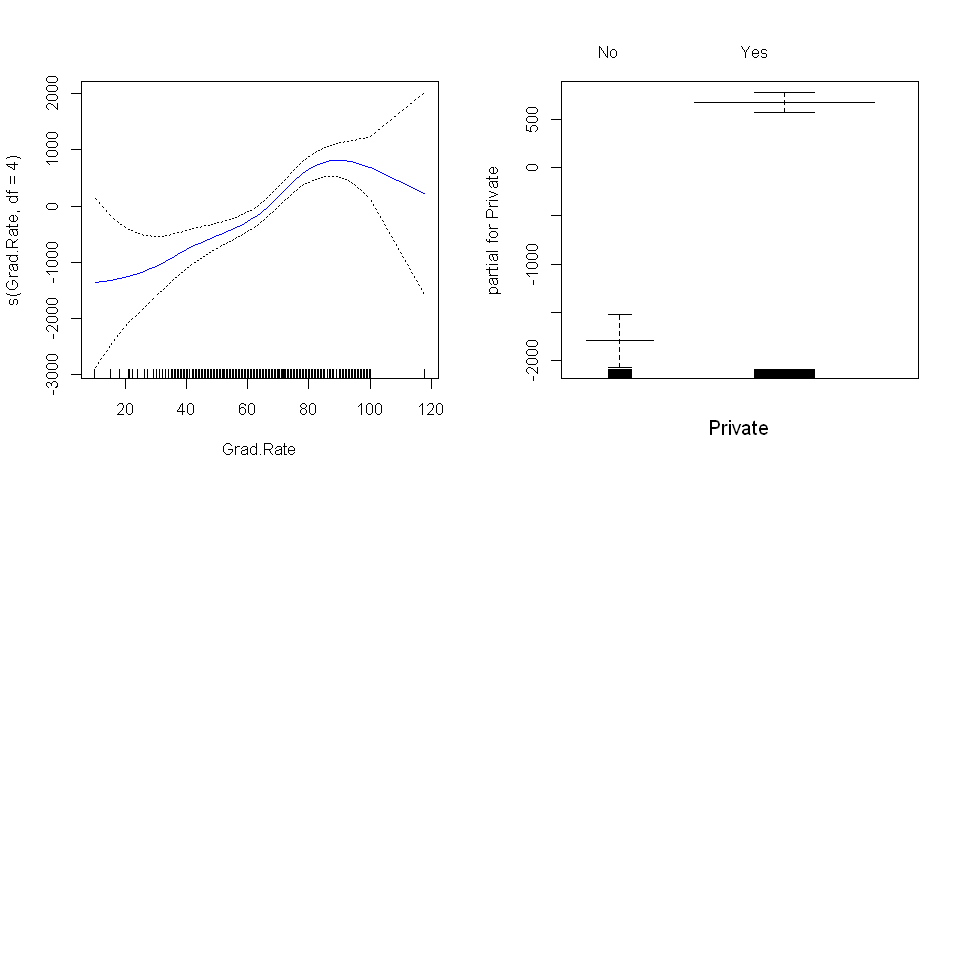

In [58]:
par(mfrow=c(2,2))
plot(gam.fit, se=TRUE, col="blue")

### Step (c)

> Evaluate the model obtained on the test set, and explain the results obtained.

In [61]:
gam.preds = predict(gam.fit, College[test,])
test.errs = mean((College[test,]$Outstate-gam.preds)^2)
test.errs

[1] 3323811

### Step (d)

> For which variables, if any, is there evidence of a non-linear relationship with the response?

In [62]:
summary(gam.fit)


Call: gam(formula = Outstate ~ s(Room.Board, df = 4) + s(PhD, df = 4) + 
    s(perc.alumni, df = 4) + s(Expend, df = 4) + s(Grad.Rate, 
    df = 4) + Private, data = College)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7495.50 -1121.84    33.03  1296.82  7843.45 

(Dispersion Parameter for gaussian family taken to be 3463360)

    Null Deviance: 12559297426 on 776 degrees of freedom
Residual Deviance: 2614837177 on 755.0001 degrees of freedom
AIC: 13928.58 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                        Df     Sum Sq    Mean Sq  F value    Pr(>F)    
s(Room.Board, df = 4)    1 4432290141 4432290141 1279.766 < 2.2e-16 ***
s(PhD, df = 4)           1  264556425  264556425   76.387 < 2.2e-16 ***
s(perc.alumni, df = 4)   1 1561812859 1561812859  450.953 < 2.2e-16 ***
s(Expend, df = 4)        1 1213494324 1213494324  350.381 < 2.2e-16 ***
s(Grad.Rate, df = 4)     1  248927365  248927365   71.874 < 2.2e-16 ***
Private     

Based on the results from above we can say that there is a strong evidence of non-linear relationship between `Outstate` and `Perc.alumni` (p-value of 0.42)

------

**Degrees of freedom are connected to the number of knots. Basically for cubic splines we have K+3 df, since cubic spline plus the knots, plus the intercept. In K+3 the intercept is not included.**

Hat Matrix & Leverage values across the diagonal of the Hat Matrix. Closed form of beta_hat